<a href="https://colab.research.google.com/github/DDGUZMANO/energia_y_contaminacion/blob/main/TP7/energia_y_contaminacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Energía y Contaminación.

## Montamos nuestra sesión de Google Colab en nuestro Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ubicamos la carpeta que contiene los datasets a estudiar

In [2]:
!ls /content/drive/My\ Drive/energia


 air-pollution.csv  'global-data-on-sustainable-energy (1).csv'


## Importación de bibliotecas a usar

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import re

## Empezamos con el dataset de contaminación del aire

Este conjunto de datos recopila información sobre la calidad del aire a través del tiempo, específicamente desde 1750 hasta 2022. Contiene registros de emisiones de diversos contaminantes, como óxidos de nitrógeno (NOx), dióxido de azufre (SO2), monóxido de carbono (CO), carbono orgánico (OC), compuestos orgánicos volátiles no metánicos (COVNM), carbono negro (BC) y amoníaco (NH3) en diferentes países del mundo.

In [4]:
path='/content/drive/My Drive/energia/air-pollution.csv'
air=pd.read_csv(path)
air.head()

Entity Code  Year  Nitrogen oxide (NOx)  \
0  Afghanistan  AFG  1750             555.47860   
1  Afghanistan  AFG  1760             578.50757   
2  Afghanistan  AFG  1770             602.47980   
3  Afghanistan  AFG  1780             627.43220   
4  Afghanistan  AFG  1790             653.40310   

   Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                        174.87167                       142073.31   
1                        181.99332                       147859.23   
2                        189.38850                       153867.40   
3                        197.06535                       160104.42   
4                        205.03189                       166576.77   

   Organic carbon (OC) emissions  \
0                      5456.8850   
1                      5679.1167   
2                      5909.8840   
3                      6149.4410   
4                      6398.0370   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          13596.633          
1                                          14150.870          
2                                          14726.470          
3                                          15324.077          
4                                          15944.332          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  Unnamed: 10  
0                    1633.0308                7681.0464          NaN  
1                    1699.5359                8000.8574          NaN  
2                    1768.5956                8333.9610          NaN  
3                    1840.2854                8680.9060          NaN  
4                    1914.6805                9042.2660          NaN

### Veamos algunas estadisticas descriptivas

In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48225 entries, 0 to 48224
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    48225 non-null  object 
 1   Code                                                      45717 non-null  object 
 2   Year                                                      48225 non-null  int64  
 3   Nitrogen oxide (NOx)                                      48225 non-null  float64
 4   Sulphur dioxide (SO₂) emissions                           48225 non-null  float64
 5   Carbon monoxide (CO) emissions                            48225 non-null  float64
 6   Organic carbon (OC) emissions                             48225 non-null  float64
 7   Non-methane volatile organic compounds (NMVOC) emissions  48225 non-null  float64
 8   Black carbon (BC

Podemos observar que el conjunto de datos es homogéneo y carece de valores nulos en la mayoría de sus columnas. Sin embargo, identificamos valores nulos en la columna 'Code', la cual indica el código de país de la entidad de estudio según la norma ISO 3166-1 alfa-3. Dada la naturaleza de nuestro análisis, hemos determinado que esta columna puede ser eliminada sin comprometer los resultados. Asimismo, la columna 'Unnamed: 10' se encuentra completamente vacía, por lo que también será descartada.

In [6]:
air.describe()

Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
count  48225.000000          4.822500e+04                     4.822500e+04   
mean    1911.032970          5.407779e+05                     8.091183e+05   
std       67.608974          4.408950e+06                     5.761058e+06   
min     1750.000000          0.000000e+00                     0.000000e+00   
25%     1854.000000          1.569637e+02                     6.362120e+01   
50%     1913.000000          1.781608e+03                     9.523438e+02   
75%     1970.000000          3.104208e+04                     3.370849e+04   
max     2022.000000          1.092431e+08                     1.345966e+08   

       Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
count                    4.822500e+04                   4.822500e+04   
mean                     4.885731e+06                   1.315203e+05   
std                      2.851080e+07                   6.740897e+05   
min                      0.000000e+00                   0.000000e+00   
25%                      1.367615e+04                   5.955074e+02   
50%                      1.087148e+05                   4.429489e+03   
75%                      6.107858e+05                   2.220716e+04   
max                      5.999133e+08                   1.361832e+07   

       Non-methane volatile organic compounds (NMVOC) emissions  \
count                                       4.822500e+04          
mean                                        8.771926e+05          
std                                         5.769500e+06          
min                                         0.000000e+00          
25%                                         2.313765e+03          
50%                                         1.770346e+04          
75%                                         1.132467e+05          
max                                         1.354817e+08          

       Black carbon (BC) emissions  Ammonia (NH₃) emissions  Unnamed: 10  
count                 4.822500e+04             4.822500e+04          0.0  
mean                  4.738836e+04             3.521420e+05          NaN  
std                   2.769505e+05             2.326560e+06          NaN  
min                   0.000000e+00             0.000000e+00          NaN  
25%                   1.490397e+02             1.370903e+03          NaN  
50%                   1.090644e+03             9.434461e+03          NaN  
75%                   6.594997e+03             5.192593e+04          NaN  
max                   6.141969e+06             6.394764e+07          NaN

En primera instancia, observamos que nuestro conjunto de datos analiza la evolución de los contaminantes a lo largo de un período de 272 años (1750-2022), evidenciando una diferencia significativa entre los niveles de contaminación iniciales y finales.

### Manejo de valores faltantes

In [7]:
print(air.isnull().sum())

Entity                                                          0
Code                                                         2508
Year                                                            0
Nitrogen oxide (NOx)                                            0
Sulphur dioxide (SO₂) emissions                                 0
Carbon monoxide (CO) emissions                                  0
Organic carbon (OC) emissions                                   0
Non-methane volatile organic compounds (NMVOC) emissions        0
Black carbon (BC) emissions                                     0
Ammonia (NH₃) emissions                                         0
Unnamed: 10                                                 48225
dtype: int64


Eliminemos las columnas con valores nulos.

In [8]:
air = air.drop(columns=['Unnamed: 10', 'Code'])

Comprobamos

In [9]:
air.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
0  Afghanistan  1750             555.47860                        174.87167   
1  Afghanistan  1760             578.50757                        181.99332   
2  Afghanistan  1770             602.47980                        189.38850   
3  Afghanistan  1780             627.43220                        197.06535   
4  Afghanistan  1790             653.40310                        205.03189   

   Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
0                       142073.31                      5456.8850   
1                       147859.23                      5679.1167   
2                       153867.40                      5909.8840   
3                       160104.42                      6149.4410   
4                       166576.77                      6398.0370   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          13596.633          
1                                          14150.870          
2                                          14726.470          
3                                          15324.077          
4                                          15944.332          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  
0                    1633.0308                7681.0464  
1                    1699.5359                8000.8574  
2                    1768.5956                8333.9610  
3                    1840.2854                8680.9060  
4                    1914.6805                9042.2660

In [10]:
print(air.isnull().sum())

Entity                                                      0
Year                                                        0
Nitrogen oxide (NOx)                                        0
Sulphur dioxide (SO₂) emissions                             0
Carbon monoxide (CO) emissions                              0
Organic carbon (OC) emissions                               0
Non-methane volatile organic compounds (NMVOC) emissions    0
Black carbon (BC) emissions                                 0
Ammonia (NH₃) emissions                                     0
dtype: int64


Ya sin valores nulos podemos mostrar los datos gráficamente.

### Visualización

Vamos a preparar un diccionario donde asignaremos a cada uno de los paises que conforman el dataset, su correspondiente continente.

In [11]:
continent_mapping = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'American Samoa': 'Oceania', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Aruba': 'North America',
    'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America',
    'Benin': 'Africa', 'Bermuda': 'North America', 'Bhutan': 'Asia', 'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa', 'Brazil': 'South America',
    'British Virgin Islands': 'North America', 'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America', 'Cape Verde': 'Africa',
    'Cayman Islands': 'North America', 'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America',
    'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo': 'Africa', 'Cook Islands': 'Oceania',
    'Costa Rica': 'North America', "Cote d'Ivoire": 'Africa', 'Croatia': 'Europe', 'Cuba': 'North America', 'Curacao': 'North America',
    'Cyprus': 'Asia', 'Czechia': 'Europe', 'Democratic Republic of Congo': 'Africa', 'Denmark': 'Europe',
    'Djibouti': 'Africa', 'Dominica': 'North America', 'Dominican Republic': 'North America', 'Ecuador': 'South America',
    'Egypt': 'Africa', 'El Salvador': 'North America', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe',
    'Eswatini': 'Africa', 'Ethiopia': 'Africa', 'Falkland Islands': 'South America', 'Faroe Islands': 'Europe', 'Fiji': 'Oceania',
    'Finland': 'Europe', 'France': 'Europe', 'French Guiana': 'South America', 'French Polynesia': 'Oceania', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Gibraltar': 'Europe', 'Greece': 'Europe',
    'Greenland': 'North America', 'Grenada': 'North America', 'Guadeloupe': 'North America', 'Guam': 'Oceania',
    'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America',
    'Honduras': 'North America', 'Hong Kong': 'Asia', 'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia',
    'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America',
    'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Oceania', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa', 'Liberia': 'Africa',
    'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Macao': 'Asia',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa', 'Malta': 'Europe',
    'Marshall Islands': 'Oceania', 'Martinique': 'North America', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Mexico': 'North America',
    'Micronesia (country)': 'Oceania', 'Moldova': 'Europe', 'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Montserrat': 'North America',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Namibia': 'Africa', 'Nepal': 'Asia', 'Netherlands': 'Europe',
    'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Niger': 'Africa', 'Nigeria': 'Africa',
    'Niue': 'Oceania', 'North Korea': 'Asia', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia',
    'Palau': 'Oceania', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Puerto Rico': 'North America', 'Qatar': 'Asia', 'Reunion': 'Africa',
    'Romania': 'Europe', 'Russia': 'Europe', 'Rwanda': 'Africa', 'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Pierre and Miquelon': 'North America', 'Saint Vincent and the Grenadines': 'North America', 'Samoa': 'Oceania',
    'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe', 'Seychelles': 'Africa',
    'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Sint Maarten (Dutch part)': 'North America', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Korea': 'Asia', 'South Sudan': 'Africa',
    'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia', 'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor': 'Asia', 'Togo': 'Africa',
    'Tokelau': 'Oceania', 'Tonga': 'Oceania', 'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia',
    'Turkmenistan': 'Asia', 'Turks and Caicos Islands': 'North America', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Vanuatu': 'Oceania',
    'Venezuela': 'South America', 'Vietnam': 'Asia', 'Wallis and Futuna': 'Oceania', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

Agregamos al dataset una columna que muestre el continente del país

In [12]:
air['Continent'] = air['Entity'].map(continent_mapping)

air.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
0  Afghanistan  1750             555.47860                        174.87167   
1  Afghanistan  1760             578.50757                        181.99332   
2  Afghanistan  1770             602.47980                        189.38850   
3  Afghanistan  1780             627.43220                        197.06535   
4  Afghanistan  1790             653.40310                        205.03189   

   Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
0                       142073.31                      5456.8850   
1                       147859.23                      5679.1167   
2                       153867.40                      5909.8840   
3                       160104.42                      6149.4410   
4                       166576.77                      6398.0370   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          13596.633          
1                                          14150.870          
2                                          14726.470          
3                                          15324.077          
4                                          15944.332          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions Continent  
0                    1633.0308                7681.0464      Asia  
1                    1699.5359                8000.8574      Asia  
2                    1768.5956                8333.9610      Asia  
3                    1840.2854                8680.9060      Asia  
4                    1914.6805                9042.2660      Asia

In [13]:
print(air.isnull().sum())

Entity                                                         0
Year                                                           0
Nitrogen oxide (NOx)                                           0
Sulphur dioxide (SO₂) emissions                                0
Carbon monoxide (CO) emissions                                 0
Organic carbon (OC) emissions                                  0
Non-methane volatile organic compounds (NMVOC) emissions       0
Black carbon (BC) emissions                                    0
Ammonia (NH₃) emissions                                        0
Continent                                                   2694
dtype: int64


De donde salieron estos valores nulos en la columna 'Continent'?

In [14]:
df_entidades = air[air['Continent'].isna()]

print(df_entidades['Entity'].unique())

['Africa' 'Asia' 'Europe' 'High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'North America' 'Oceania' 'South America'
 'United States Virgin Islands' 'Upper-middle-income countries'
 'Western Sahara' 'World']


Podemos observar que los registros que contienen valores nulos en la columna 'Continente' no corresponden a un continente específico. Por el contrario, representan un continente o una agrupación de países basada en criterios económicos.

Vamos separar df_entidades de air, formando dos datasets distintos.

In [15]:
df_entidades.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
228  Africa  1750             17671.812                        7693.8726   
229  Africa  1760             17750.662                        7700.5747   
230  Africa  1770             17836.184                        7709.6570   
231  Africa  1780             17928.623                        7721.0396   
232  Africa  1790             18028.533                        7734.8390   

     Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
228                       3283140.0                      174831.50   
229                       3288960.8                      175004.75   
230                       3295845.2                      175232.31   
231                       3303775.8                      175512.27   
232                       3312819.8                      175845.30   

     Non-methane volatile organic compounds (NMVOC) emissions  \
228                                          420443.03          
229                                          420842.38          
230                                          421382.25          
231                                          422058.16          
232                                          422879.56          

     Black carbon (BC) emissions  Ammonia (NH₃) emissions Continent  
228                    47376.312                294775.34       NaN  
229                    47419.586                295370.38       NaN  
230                    47477.630                296091.75       NaN  
231                    47549.906                296939.34       NaN  
232                    47636.790                297921.56       NaN

In [16]:
df_entidades.drop(columns='Continent',inplace=True)

<ipython-input-16-b8a498ad7e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entidades.drop(columns='Continent',inplace=True)


In [17]:
df_entidades.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
228  Africa  1750             17671.812                        7693.8726   
229  Africa  1760             17750.662                        7700.5747   
230  Africa  1770             17836.184                        7709.6570   
231  Africa  1780             17928.623                        7721.0396   
232  Africa  1790             18028.533                        7734.8390   

     Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
228                       3283140.0                      174831.50   
229                       3288960.8                      175004.75   
230                       3295845.2                      175232.31   
231                       3303775.8                      175512.27   
232                       3312819.8                      175845.30   

     Non-methane volatile organic compounds (NMVOC) emissions  \
228                                          420443.03          
229                                          420842.38          
230                                          421382.25          
231                                          422058.16          
232                                          422879.56          

     Black carbon (BC) emissions  Ammonia (NH₃) emissions  
228                    47376.312                294775.34  
229                    47419.586                295370.38  
230                    47477.630                296091.75  
231                    47549.906                296939.34  
232                    47636.790                297921.56

In [18]:
air.dropna(subset=['Continent'],inplace=True)
print(air.isnull().sum())

Entity                                                      0
Year                                                        0
Nitrogen oxide (NOx)                                        0
Sulphur dioxide (SO₂) emissions                             0
Carbon monoxide (CO) emissions                              0
Organic carbon (OC) emissions                               0
Non-methane volatile organic compounds (NMVOC) emissions    0
Black carbon (BC) emissions                                 0
Ammonia (NH₃) emissions                                     0
Continent                                                   0
dtype: int64


#### Grafico de contaminantes a traves de los años.

In [19]:
contaminantes = air.columns.difference(['Year', 'Entity', 'Continent'])
print(contaminantes)

Index(['Ammonia (NH₃) emissions', 'Black carbon (BC) emissions',
       'Carbon monoxide (CO) emissions', 'Nitrogen oxide (NOx)',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Organic carbon (OC) emissions', 'Sulphur dioxide (SO₂) emissions'],
      dtype='object')


Agrupamos por año y obtenemos la sumatoria de cada uno de los contaminantes por año.

In [20]:
suma_contaminantes_por_año = air.groupby('Year')[contaminantes].sum().reset_index()

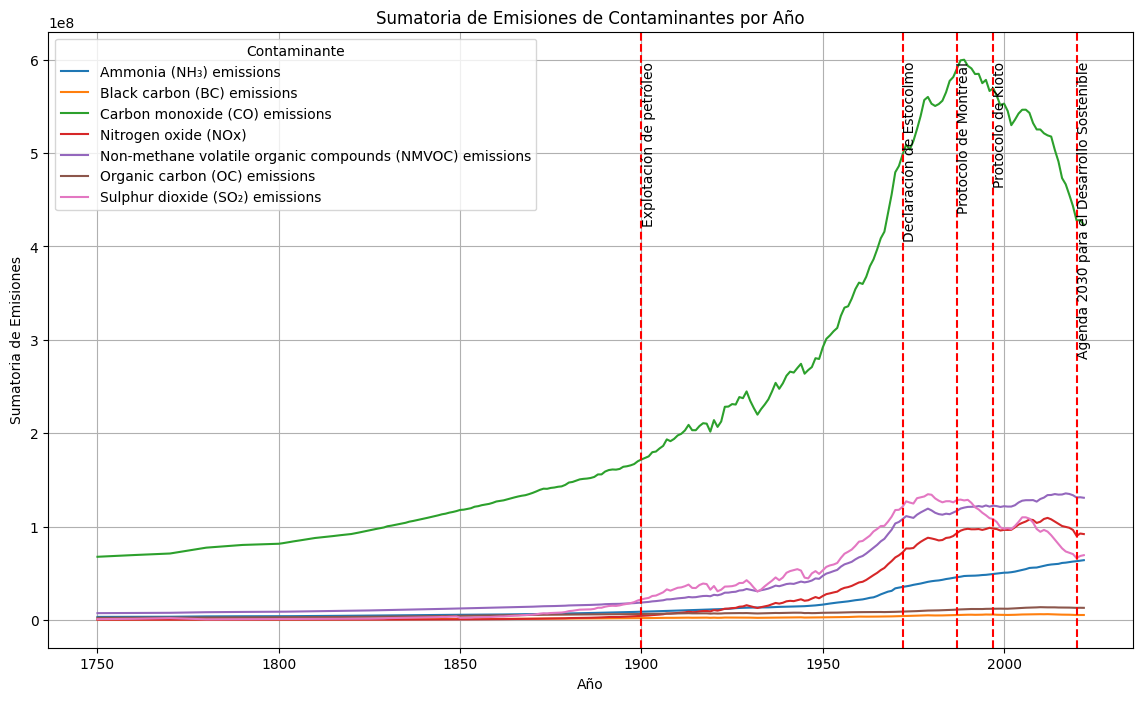

In [21]:
plt.figure(figsize=(14, 8))

for contaminante in contaminantes:
    sns.lineplot(data=suma_contaminantes_por_año, x='Year', y=contaminante, label=contaminante)

eventos = {
    1900: 'Explotación de petróleo',
    1972: 'Declaración de Estocolmo',
    1987: 'Protocolo de Montreal',
    1997: 'Protocolo de Kioto',
    2020: 'Agenda 2030 para el Desarrollo Sostenible'
}

for year, evento in eventos.items():
    plt.axvline(x=year, color='red', linestyle='--')
    plt.text(year, plt.ylim()[1]*0.95, evento, rotation=90, verticalalignment='top')

plt.title('Sumatoria de Emisiones de Contaminantes por Año')
plt.xlabel('Año')
plt.ylabel('Sumatoria de Emisiones')
plt.legend(title='Contaminante')
plt.grid(True)
plt.show()

#### Graficos de paises mas contaminantes.

Calcularmos el promedio de emisiones por país

In [22]:
promedio_emisiones_por_pais = air.groupby('Entity')[contaminantes].mean().reset_index()

Calculamos la sumatoria total de contaminantes por país para seleccionar los más contaminantes

In [23]:
promedio_emisiones_por_pais['Total_Emisiones'] = promedio_emisiones_por_pais[contaminantes].sum(axis=1)
promedio_emisiones_por_pais.head()

Entity  Ammonia (NH₃) emissions  Black carbon (BC) emissions  \
0     Afghanistan             42210.317159                  4373.515639   
1         Albania             12226.588412                   638.257069   
2         Algeria             28787.469704                 15754.664167   
3  American Samoa               107.332095                     8.182787   
4          Angola             35865.704388                  7367.140871   

   Carbon monoxide (CO) emissions  Nitrogen oxide (NOx)  \
0                   374360.477325          69383.597261   
1                   102376.174654           6935.859796   
2                   420441.751732          69204.423895   
3                      772.259020            274.830731   
4                   482576.712500          17140.537234   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                       78180.721439          
1                                       16781.553511          
2                                      230860.730368          
3                                         140.464600          
4                                      143026.963303          

   Organic carbon (OC) emissions  Sulphur dioxide (SO₂) emissions  \
0                   14474.336135                      3462.164504   
1                    4806.402801                     12061.844536   
2                   27000.652014                     17394.828374   
3                      21.313674                       710.660730   
4                   23398.946127                      7181.416573   

   Total_Emisiones  
0    586445.129460  
1    155826.680779  
2    809444.520255  
3      2035.043638  
4    716557.420996

Seleccionamos los 10 países más contaminantes a nivel global

In [24]:
top_10_paises_global = promedio_emisiones_por_pais.nlargest(10, 'Total_Emisiones')
top_10_paises_global.head()

Entity  Ammonia (NH₃) emissions  Black carbon (BC) emissions  \
207   United States             1.491332e+06                307016.551004   
39            China             4.122953e+06                540223.603333   
91            India             2.343952e+06                286716.972741   
161          Russia             9.430094e+05                115647.567759   
206  United Kingdom             1.768899e+05                110947.333579   

     Carbon monoxide (CO) emissions  Nitrogen oxide (NOx)  \
207                    5.522749e+07          7.511777e+06   
39                     6.203323e+07          3.662060e+06   
91                     1.884261e+07          1.303766e+06   
161                    1.057667e+07          1.692097e+06   
206                    6.827882e+06          9.083067e+05   

     Non-methane volatile organic compounds (NMVOC) emissions  \
207                                       9.224261e+06          
39                                        7.431029e+06          
91                                        3.114111e+06          
161                                       2.170754e+06          
206                                       8.872636e+05          

     Organic carbon (OC) emissions  Sulphur dioxide (SO₂) emissions  \
207                   9.524365e+05                     9.626677e+06   
39                    1.042381e+06                     4.803836e+06   
91                    8.839487e+05                     1.310759e+06   
161                   4.824786e+05                     2.798973e+06   
206                   1.572250e+05                     3.025578e+06   

     Total_Emisiones  
207     8.434099e+07  
39      8.363571e+07  
91      2.808587e+07  
161     1.877963e+07  
206     1.209409e+07

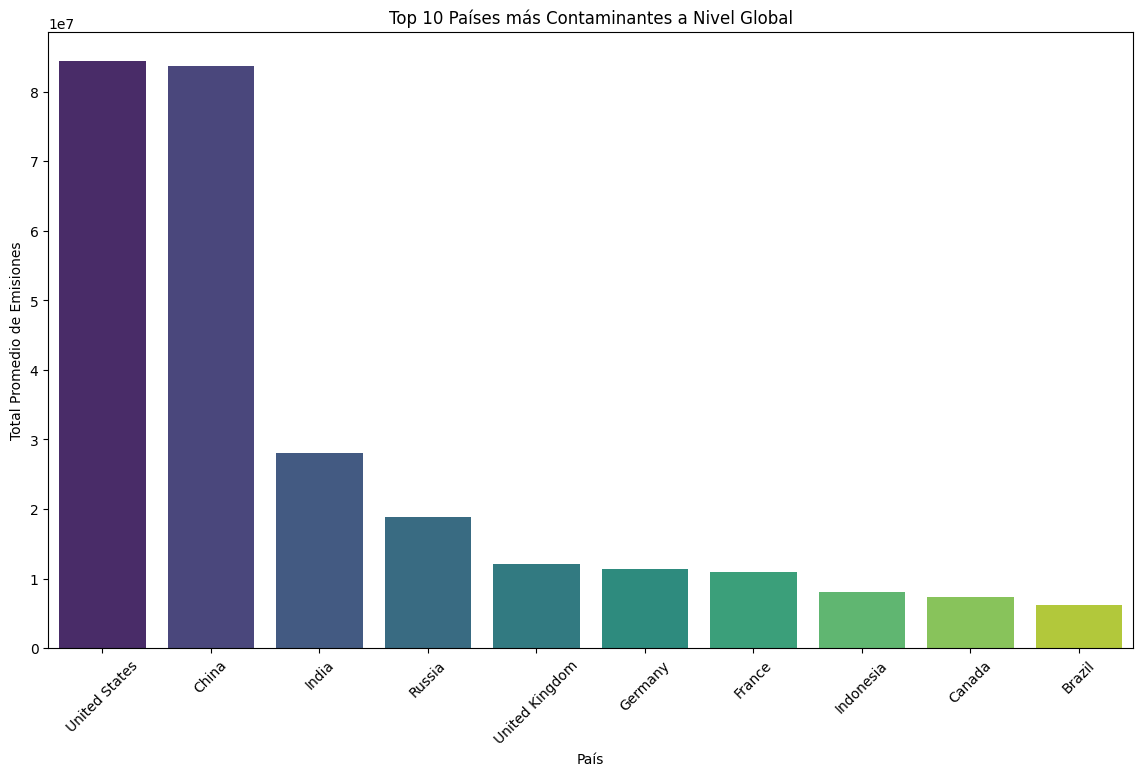

In [25]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_paises_global, x='Entity', y='Total_Emisiones', palette='viridis')
plt.title('Top 10 Países más Contaminantes a Nivel Global')
plt.xlabel('País')
plt.ylabel('Total Promedio de Emisiones')
plt.xticks(rotation=45)
plt.show()

Calcular el promedio de emisiones por país y continente

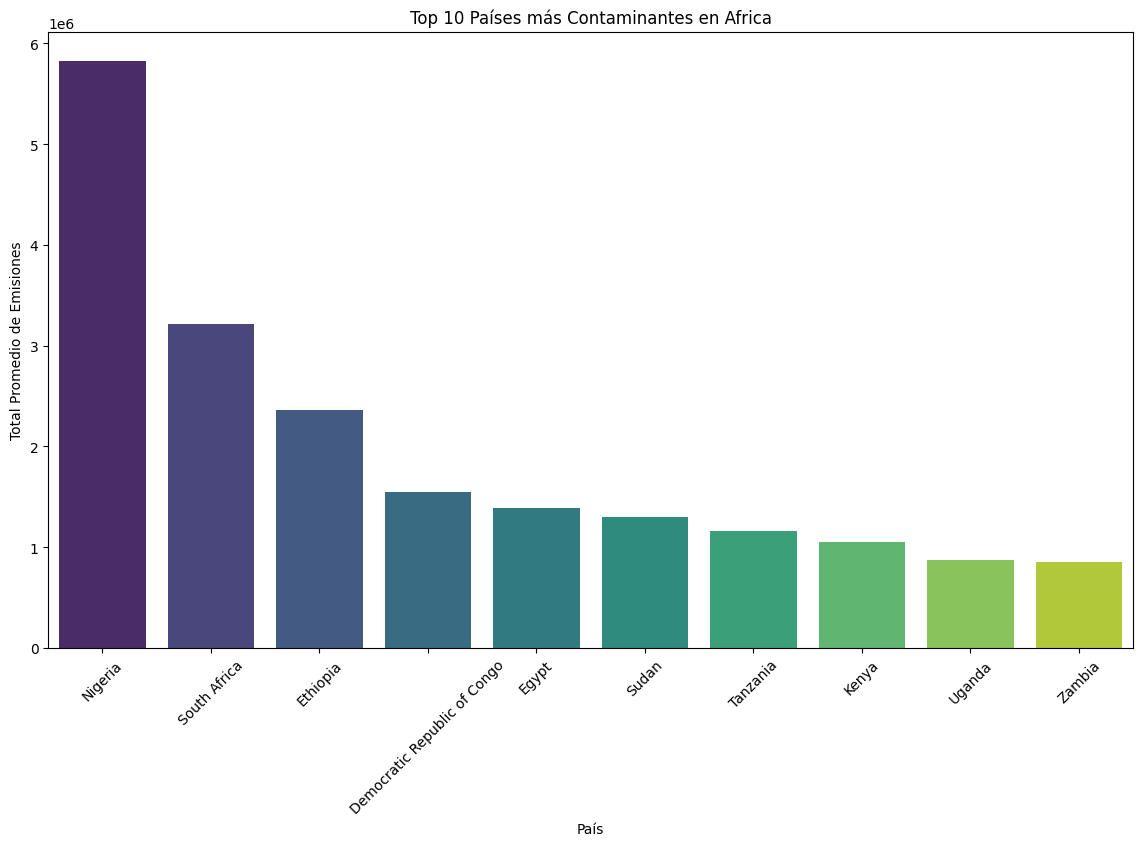

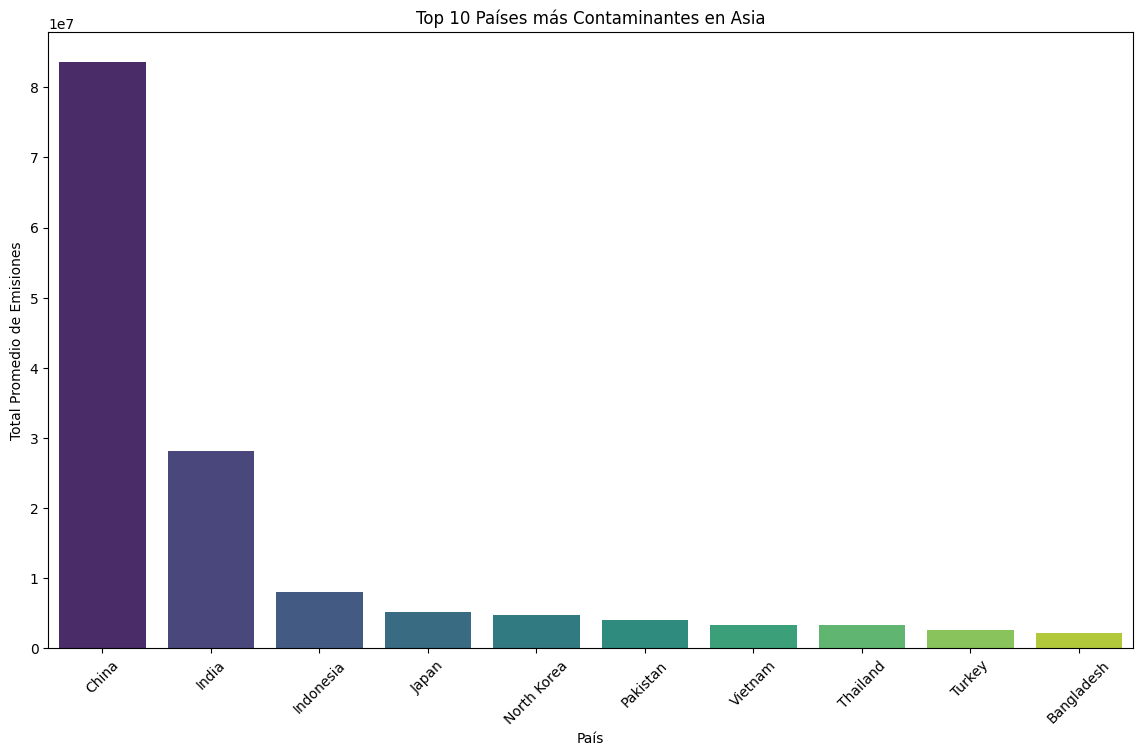

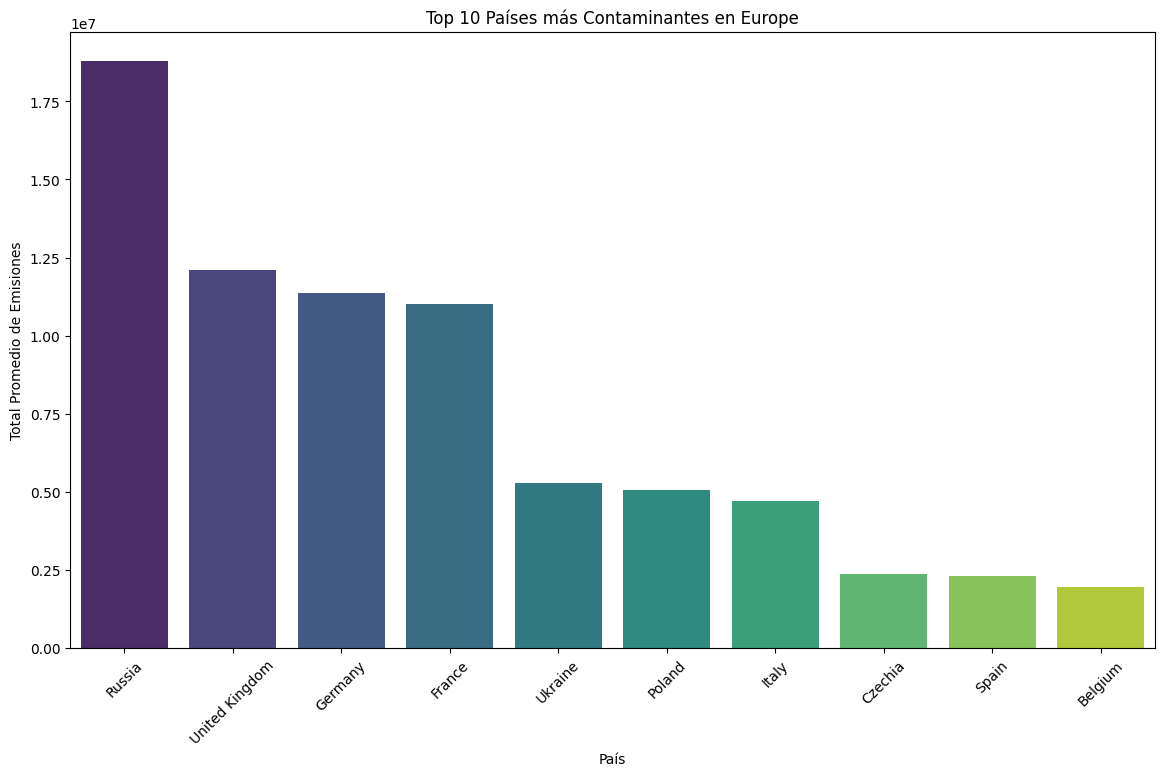

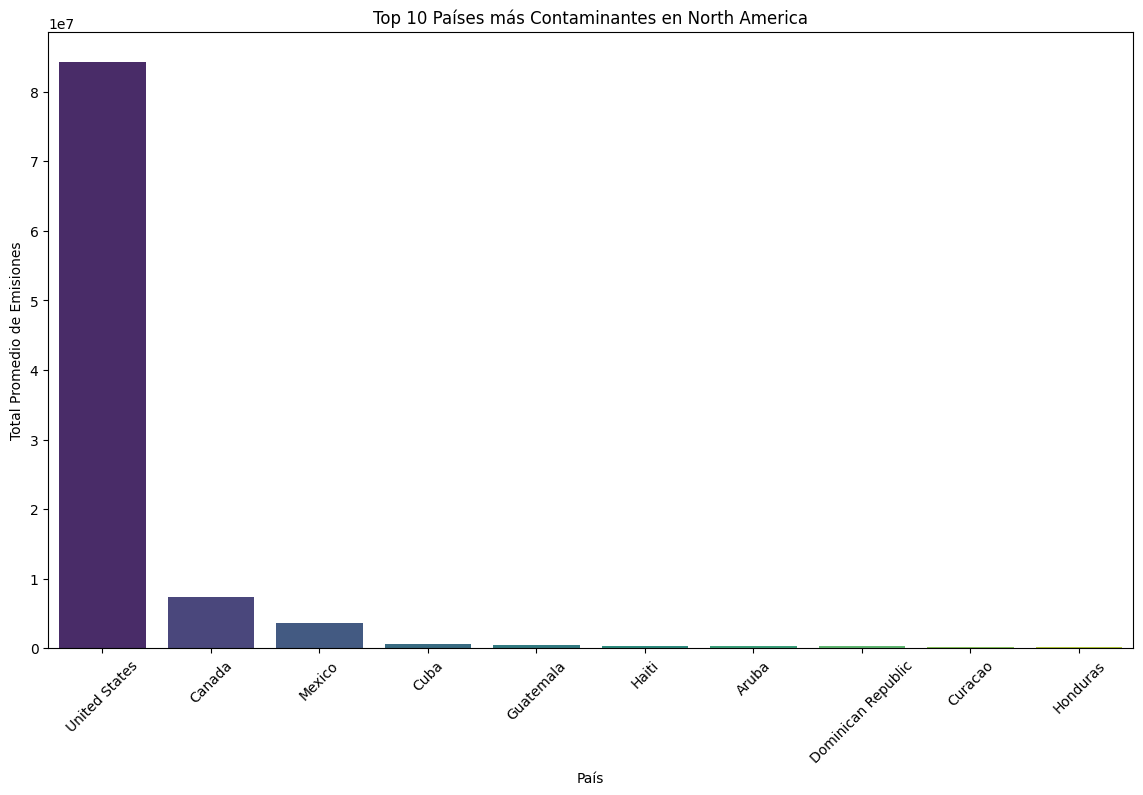

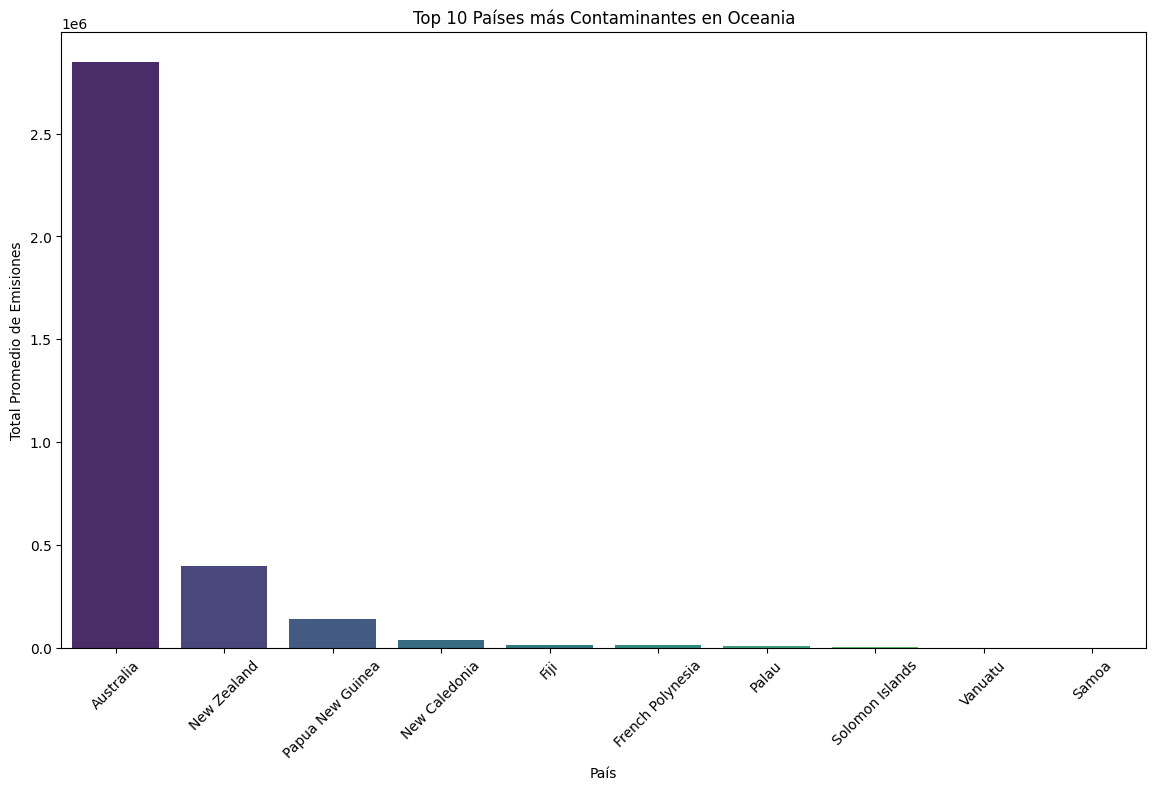

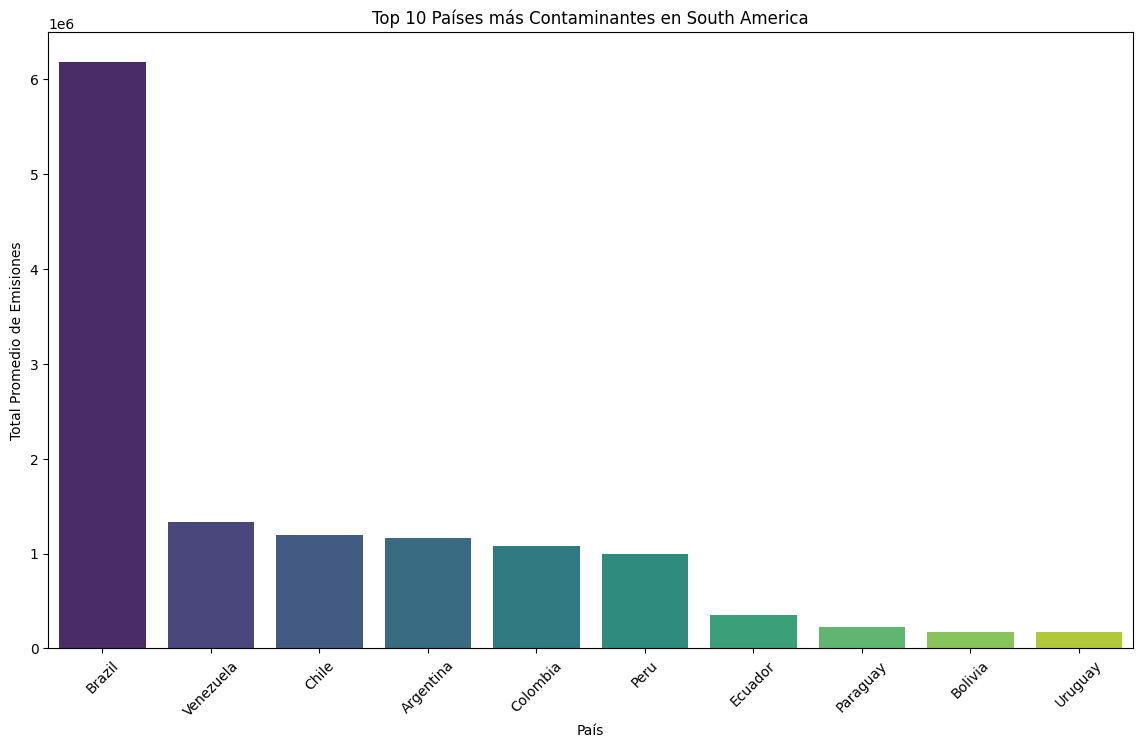

In [26]:
promedio_emisiones_por_region = air.groupby(['Continent', 'Entity'])[contaminantes].mean().reset_index()
promedio_emisiones_por_region['Total_Emisiones'] = promedio_emisiones_por_region[contaminantes].sum(axis=1)
continentes = promedio_emisiones_por_region['Continent'].unique()
for continente in continentes:
    top_10_paises_region = promedio_emisiones_por_region[promedio_emisiones_por_region['Continent'] == continente].nlargest(10, 'Total_Emisiones')
    plt.figure(figsize=(14, 8))
    sns.barplot(data=top_10_paises_region, x='Entity', y='Total_Emisiones', palette='viridis')
    plt.title(f'Top 10 Países más Contaminantes en {continente}')
    plt.xlabel('País')
    plt.ylabel('Total Promedio de Emisiones')
    plt.xticks(rotation=45)
    plt.show()

#### Gráficas del comportamiento de las emisiones de contaminantes en las diferentes regiones.

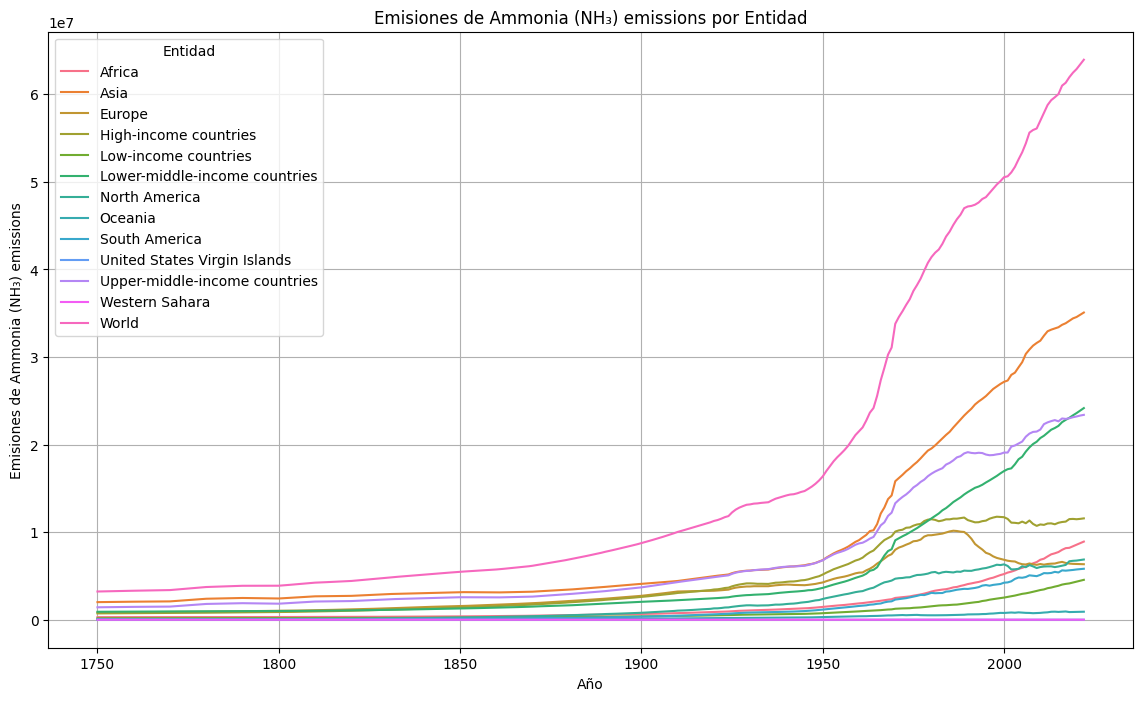

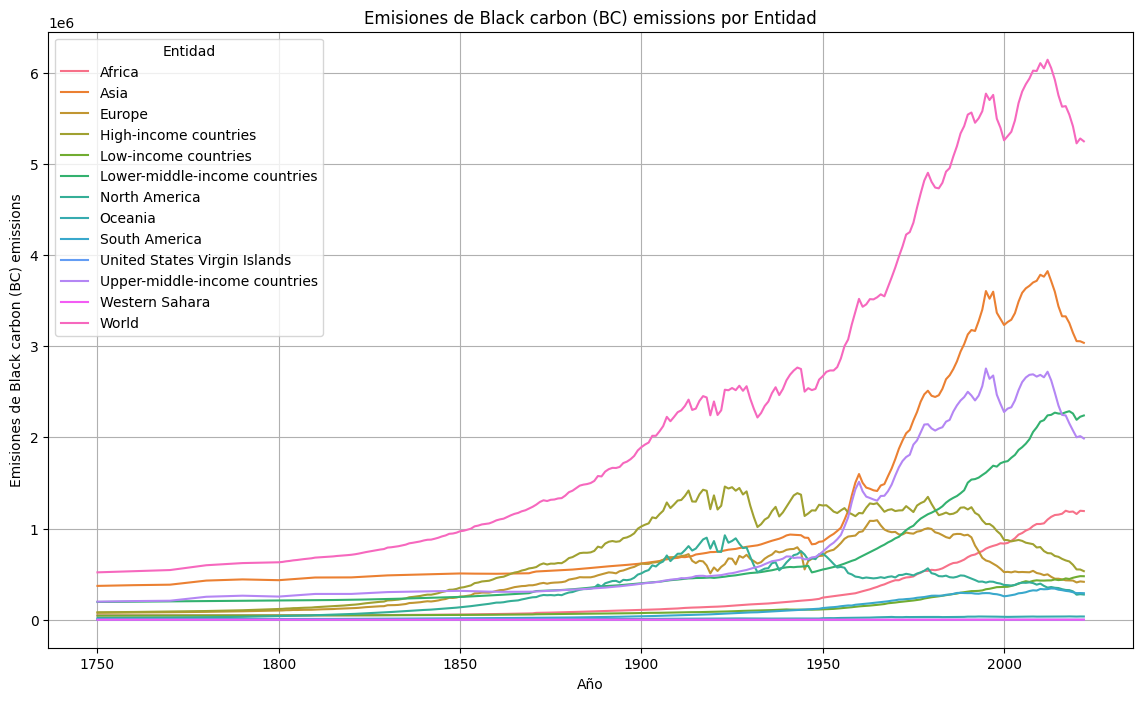

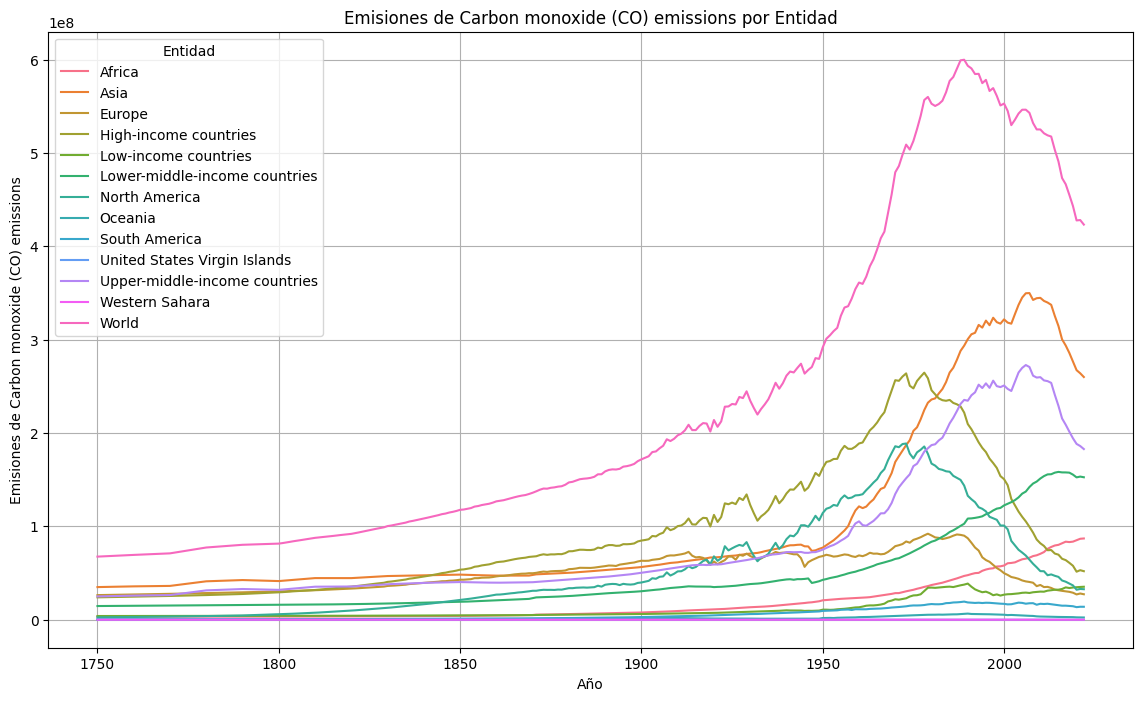

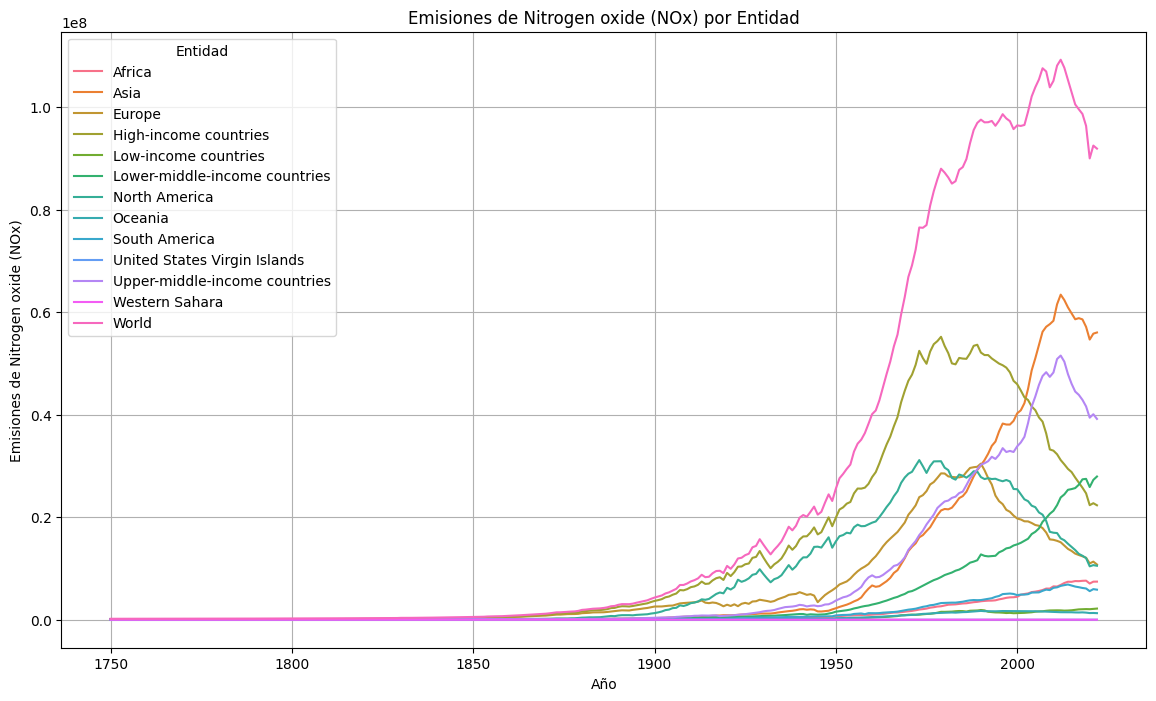

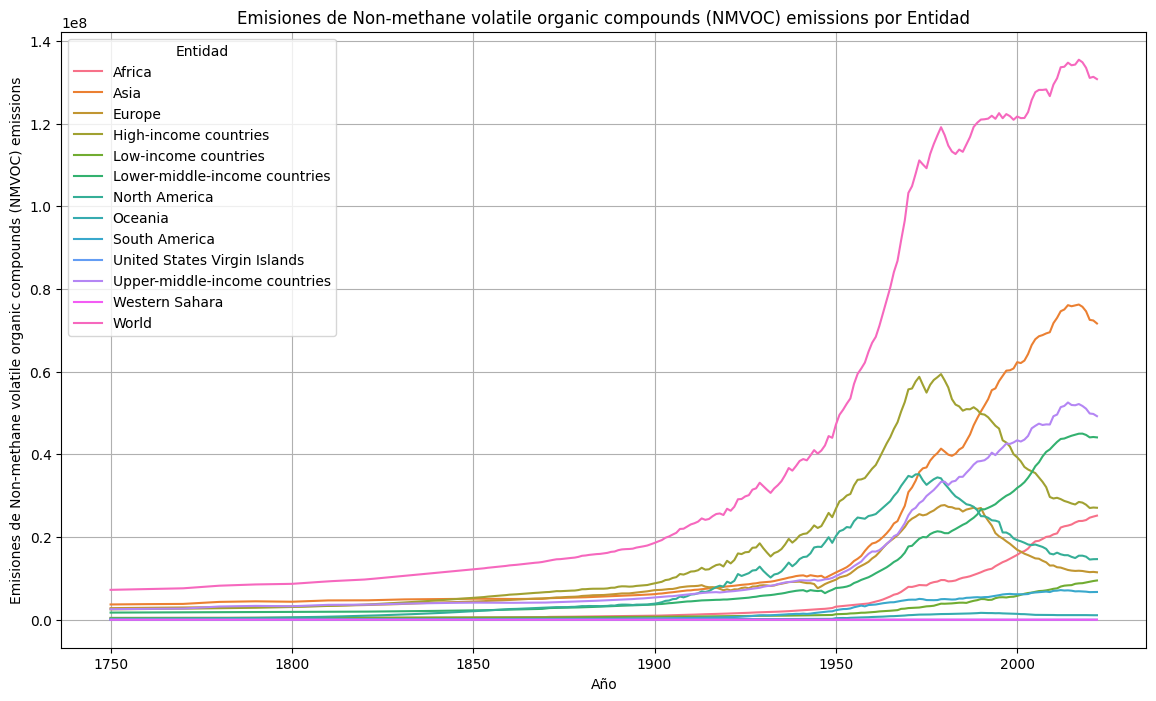

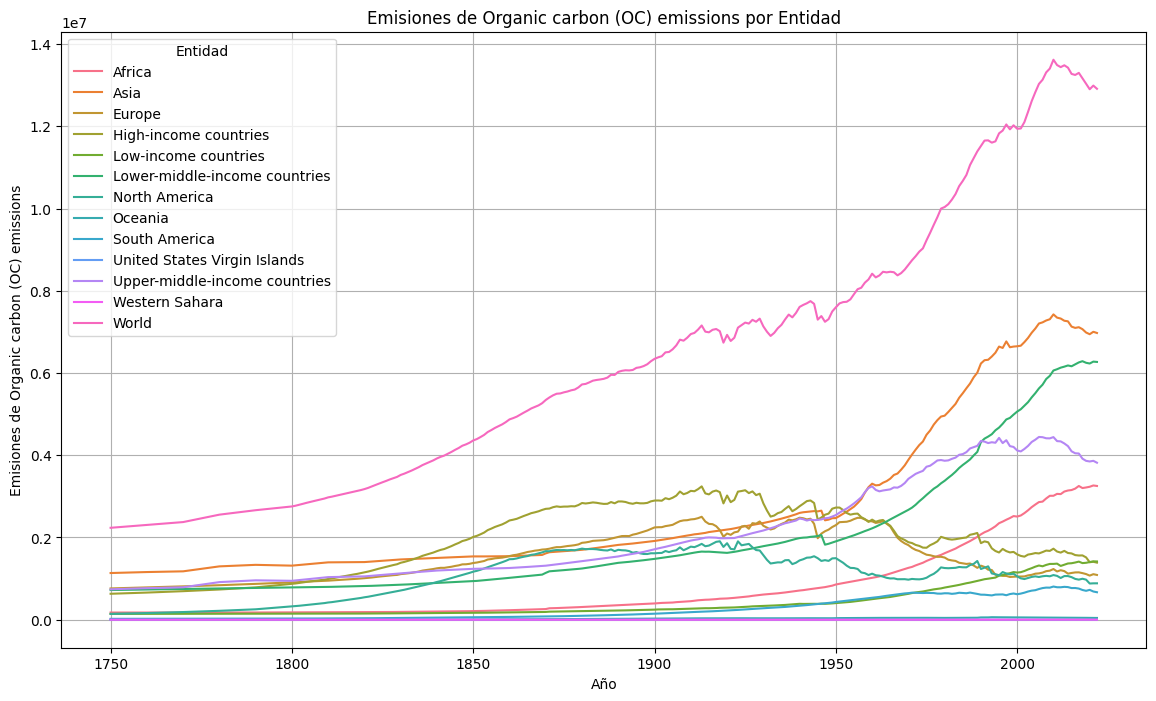

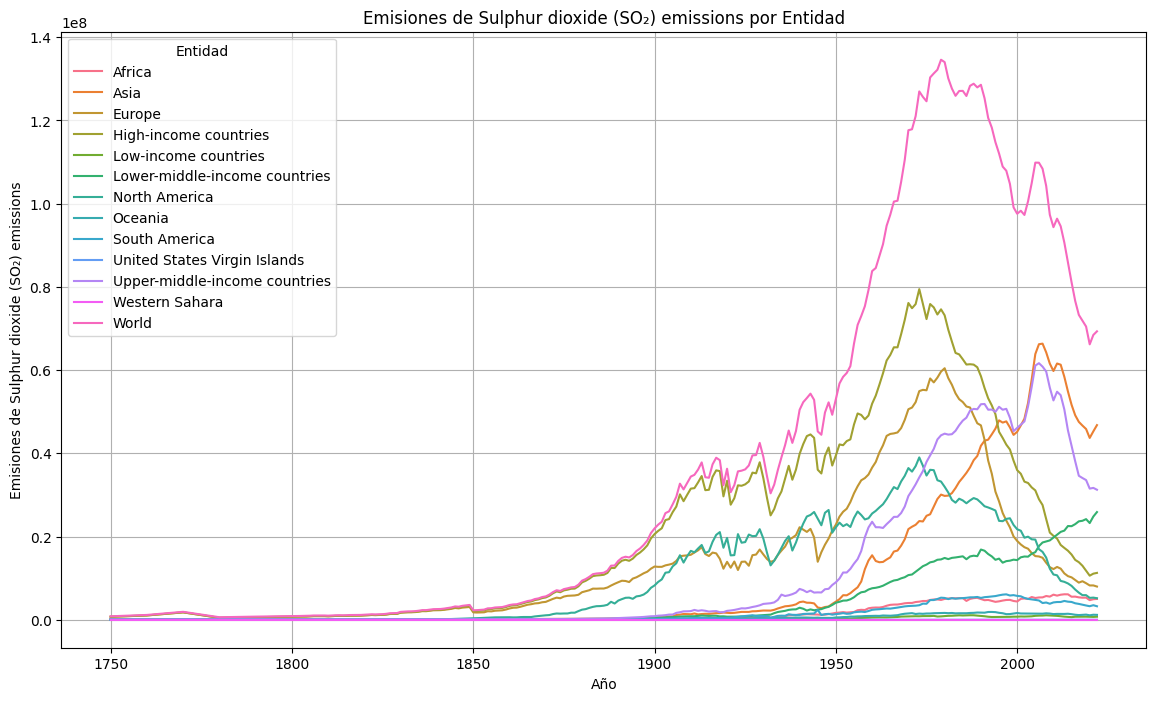

In [27]:
suma_contaminantes_por_entidad_año = df_entidades.groupby(['Entity', 'Year'])[contaminantes].sum().reset_index()
for contaminante in contaminantes:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=suma_contaminantes_por_entidad_año, x='Year', y=contaminante, hue='Entity')
    plt.title(f'Emisiones de {contaminante} por Entidad')
    plt.xlabel('Año')
    plt.ylabel(f'Emisiones de {contaminante}')
    plt.legend(title='Entidad')
    plt.grid(True)
    plt.show()

#### Gráfica region del mundo mas contaminante

In [28]:
df_entidades = df_entidades[df_entidades['Entity'] != 'World']

contaminantes = df_entidades.columns[2:]

promedio_contaminantes_por_entidad_año = df_entidades.groupby(['Entity', 'Year'])[contaminantes].mean().reset_index()

promedio_contaminantes_por_entidad_año['Promedio_Contaminantes'] = promedio_contaminantes_por_entidad_año[contaminantes].mean(axis=1)

In [29]:
promedio_contaminantes_por_entidad_año.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
0  Africa  1750             17671.812                        7693.8726   
1  Africa  1760             17750.662                        7700.5747   
2  Africa  1770             17836.184                        7709.6570   
3  Africa  1780             17928.623                        7721.0396   
4  Africa  1790             18028.533                        7734.8390   

   Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
0                       3283140.0                      174831.50   
1                       3288960.8                      175004.75   
2                       3295845.2                      175232.31   
3                       3303775.8                      175512.27   
4                       3312819.8                      175845.30   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          420443.03          
1                                          420842.38          
2                                          421382.25          
3                                          422058.16          
4                                          422879.56          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  \
0                    47376.312                294775.34   
1                    47419.586                295370.38   
2                    47477.630                296091.75   
3                    47549.906                296939.34   
4                    47636.790                297921.56   

   Promedio_Contaminantes  
0           606561.695229  
1           607578.447529  
2           608796.425857  
3           610212.162657  
4           611838.054571

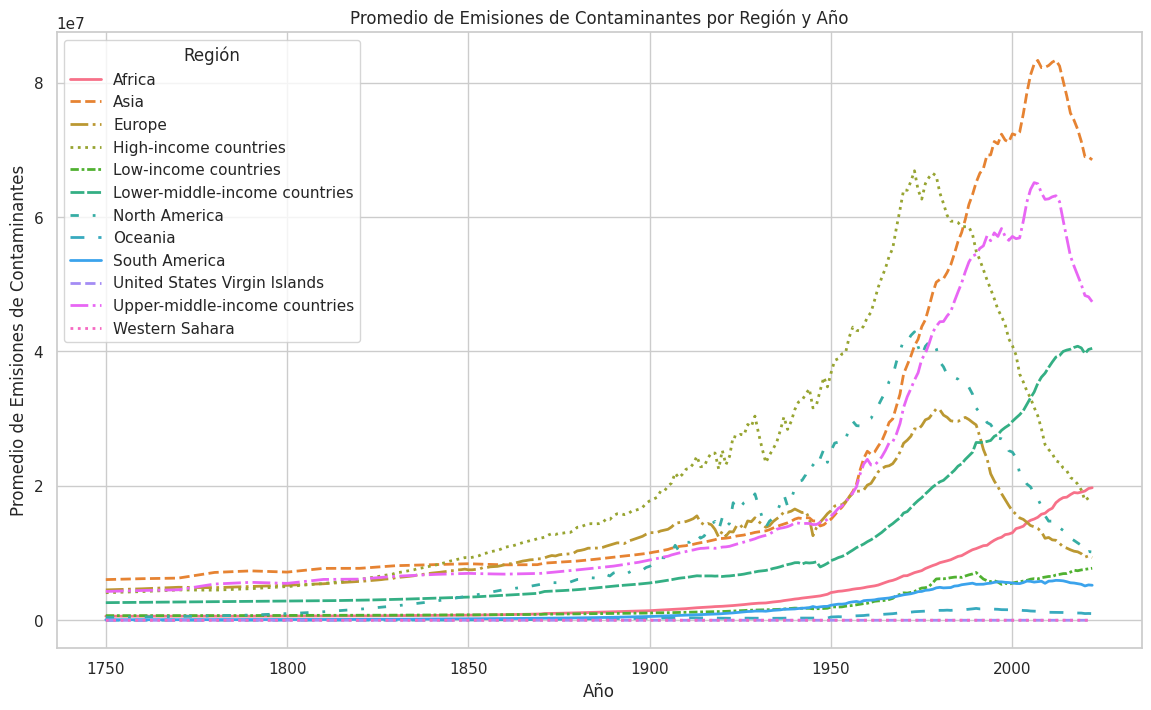

In [30]:
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(promedio_contaminantes_por_entidad_año['Entity'].unique()))
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5)), (0, (5, 5))]

plt.figure(figsize=(14, 8))

for i, (region, data) in enumerate(promedio_contaminantes_por_entidad_año.groupby('Entity')):
    sns.lineplot(data=data, x='Year', y='Promedio_Contaminantes', label=region,
                 color=palette[i % len(palette)], linestyle=linestyles[i % len(linestyles)], linewidth=2)

plt.title('Promedio de Emisiones de Contaminantes por Región y Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Emisiones de Contaminantes')
plt.legend(title='Región')
plt.grid(True)
plt.show()

#### Gráfico de la distribución de emisiones promedio de contaminantes por región

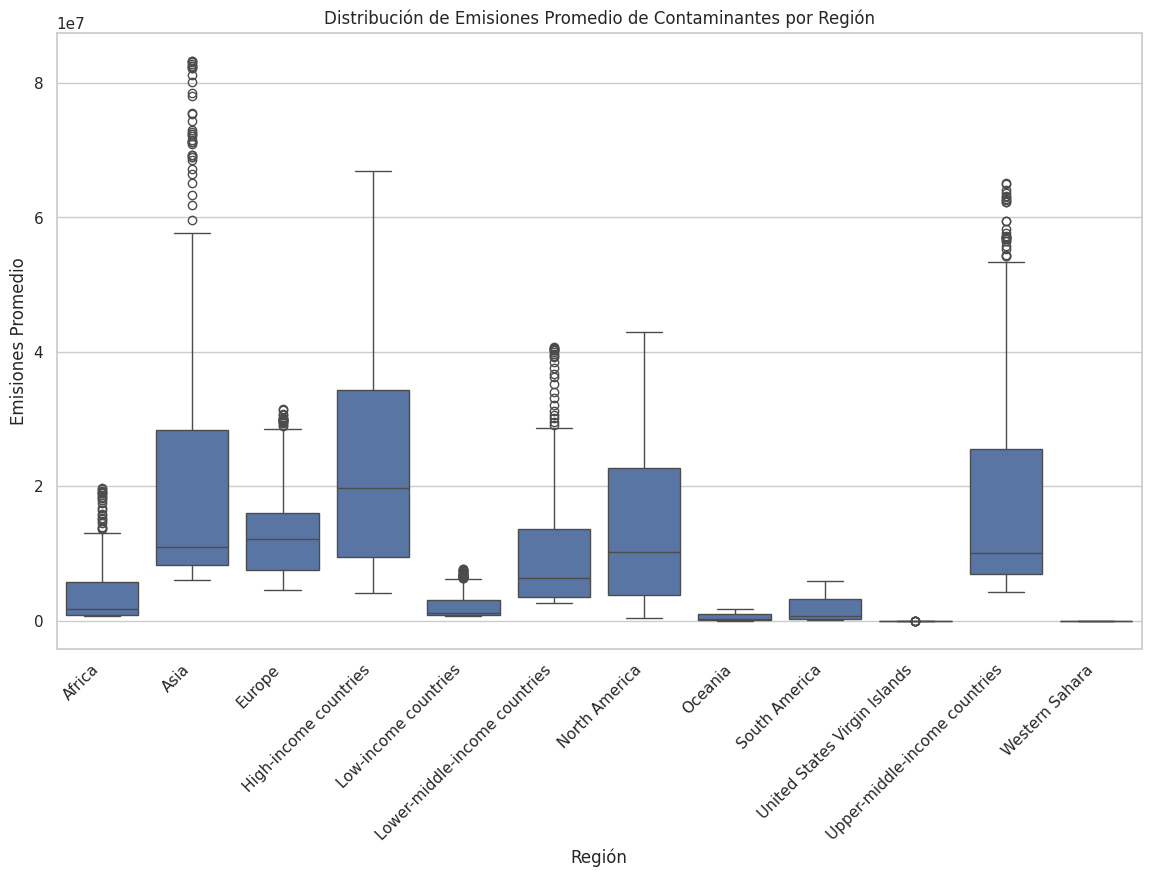

In [31]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=promedio_contaminantes_por_entidad_año, x='Entity', y='Promedio_Contaminantes')
plt.title('Distribución de Emisiones Promedio de Contaminantes por Región')
plt.xlabel('Región')
plt.ylabel('Emisiones Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

Los datos graficados evidencian una desigualdad en la distribución de las emisiones contaminantes a nivel regional, siendo las regiones más desarrolladas las que contribuyen en mayor medida a la degradación de la calidad del aire a escala global.

#### Gráfico de una matriz de correlacion entre los contaminantes

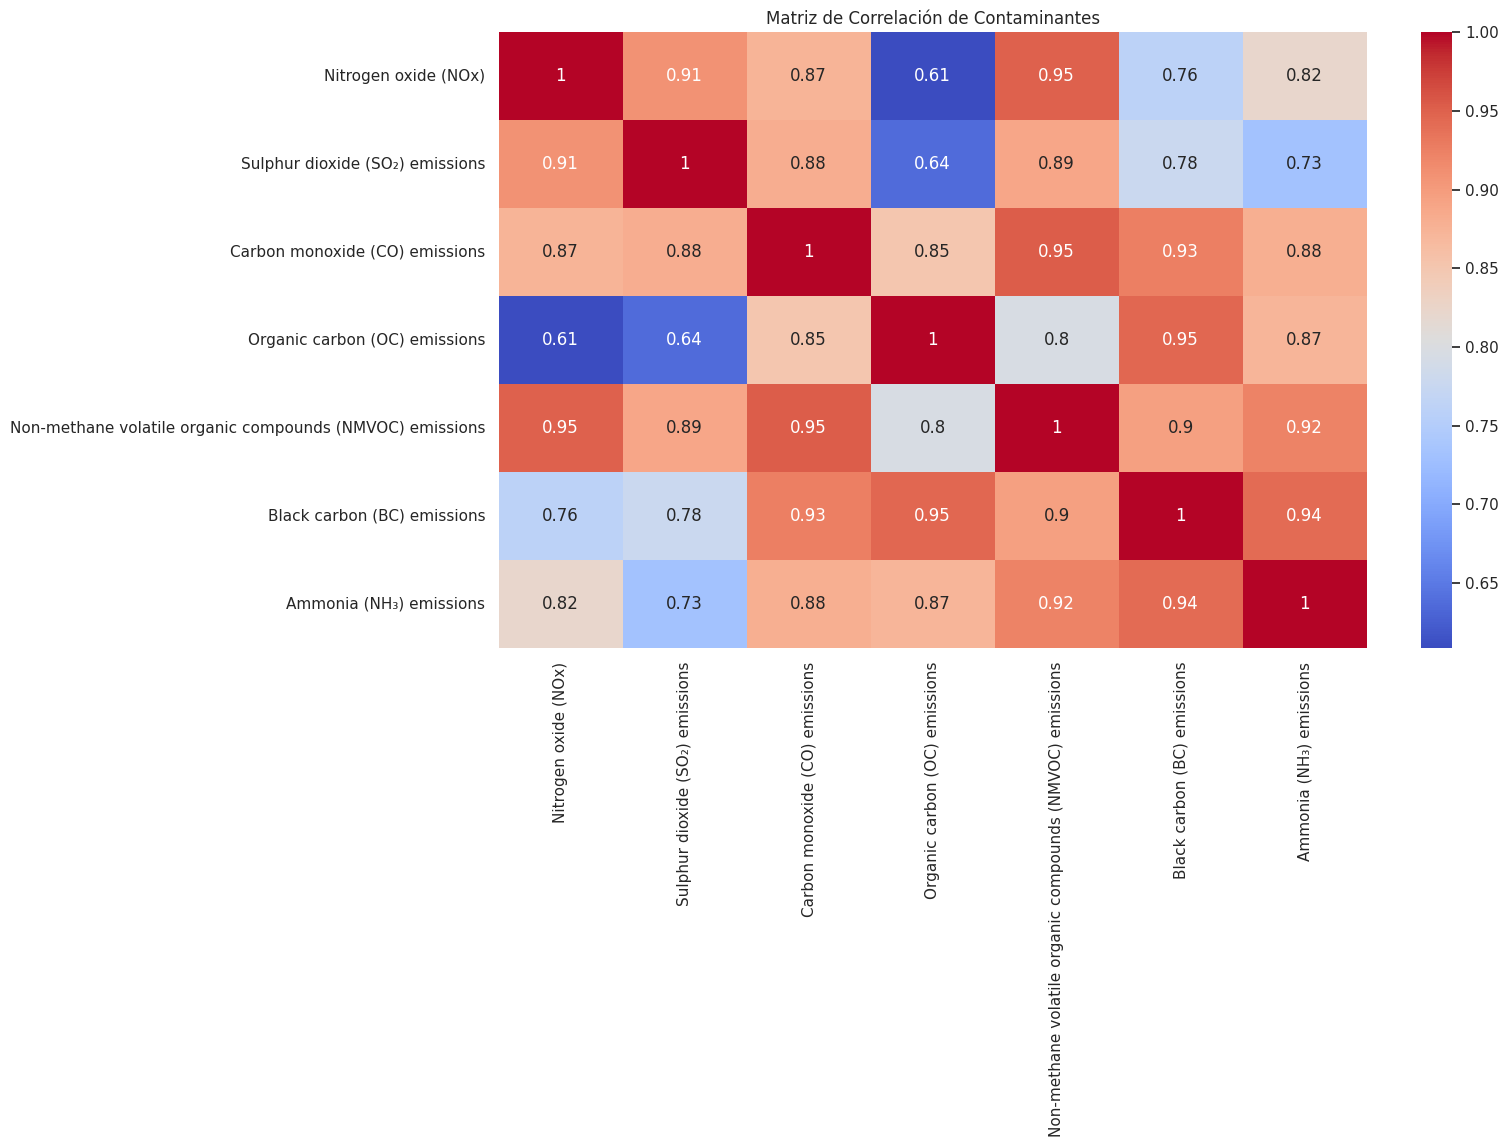

In [32]:
correlaciones = df_entidades[contaminantes].corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Contaminantes')
plt.show()

La gráfica revela una clara asociación entre las emisiones de compuestos carbonosos, como el carbono negro, el monóxido de carbono y el carbono orgánico, que son típicamente generados en procesos de combustión incompleta. En contraste, la correlación con el dióxido de azufre y el óxido nitroso es menos marcada. Esta diferencia puede atribuirse a diversos factores, incluyendo las condiciones de combustión, la composición del combustible y la presencia de catalizadores. Por ejemplo, las emisiones de compuestos carbonosos suelen predominar a temperaturas más bajas, mientras que la formación de óxidos de azufre y nitrógeno requiere temperaturas más elevadas.

#### Gráfica de analisis de tendencias

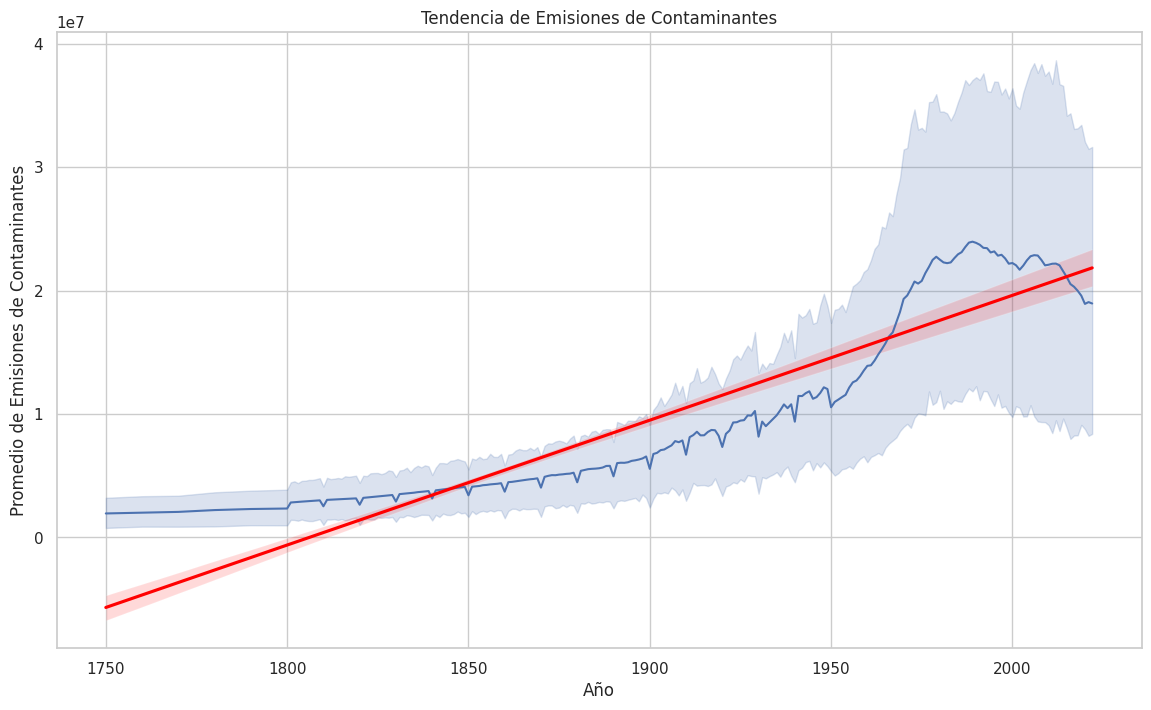

In [33]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=promedio_contaminantes_por_entidad_año, x='Year', y='Promedio_Contaminantes')

# Añadir línea de tendencia
sns.regplot(data=promedio_contaminantes_por_entidad_año, x='Year', y='Promedio_Contaminantes', scatter=False, color='red')

plt.title('Tendencia de Emisiones de Contaminantes')
plt.xlabel('Año')
plt.ylabel('Promedio de Emisiones de Contaminantes')
plt.show()

La gráfica de tendencia, especificamente la linea roja nos indica que las emisiones de contaminantes al aire siguen en franco aumento.

### Conlusiones sobre analisis del dataset de emisiones historicas de contamiantes al ambiente.

Tendencia histórica y relación con la industrialización:

*El análisis de los datos revela una clara tendencia al alza en
las emisiones de contaminantes atmosféricos a lo largo de la historia, especialmente a partir del siglo XX. Esta tendencia coincide con la intensificación de la actividad industrial y la creciente dependencia de los combustibles fósiles.

*El monóxido de carbono se destaca como el contaminante más emitido a lo largo del período estudiado, lo que subraya la importancia de los procesos de combustión incompleta en la generación de contaminación atmosférica.

*La explotación masiva del petróleo a partir del siglo XX ha sido un factor determinante en el aumento de las emisiones de diversos contaminantes, incluyendo compuestos carbonosos y óxidos de nitrógeno y azufre.

Patrones regionales y factores influyentes:

*Estados Unidos y China se perfilan como los principales emisores de contaminantes a nivel mundial, lo que refleja su alto grado de industrialización y su gran población.
Sin embargo, a nivel continental, se observa una tendencia común: los países más industrializados y poblados son también los mayores contaminantes.

*La composición de los contaminantes emitidos varía en función de factores como la temperatura de combustión, la composición del combustible y la presencia de catalizadores. Los compuestos carbonosos, como el carbono negro y el monóxido de carbono, muestran una mayor correlación entre sí, lo que sugiere un origen común en procesos de combustión incompleta.
Efectos de la regulación ambiental:

*Si bien el Protocolo de Montreal ha logrado reducir significativamente las emisiones de sustancias que dañan la capa de ozono, su impacto en las emisiones totales de contaminantes atmosféricos ha sido menos evidente.

*A pesar de los esfuerzos regulatorios, la tendencia general de las emisiones sigue siendo al alza, lo que indica la necesidad de implementar políticas más ambiciosas y eficaces para reducir la contaminación del aire.

Conclusiones generales y recomendaciones:

*La contaminación atmosférica es un problema global con profundas raíces históricas y económicas.

*La transición hacia una economía baja en carbono y la adopción de tecnologías limpias son fundamentales para reducir las emisiones de contaminantes y mejorar la calidad del aire.

*Es necesario fortalecer la cooperación internacional para abordar este desafío global y establecer objetivos ambiciosos de reducción de emisiones.

*La investigación continua es esencial para comprender mejor los mecanismos de formación y transporte de los contaminantes atmosféricos, así como para evaluar la eficacia de las medidas de mitigación.

## Dataset de energias renovables globales

### Abrimos el dataset con pandas

In [34]:
!ls /content/drive/My\ Drive/energia

 air-pollution.csv  'global-data-on-sustainable-energy (1).csv'


In [35]:
path_ene='/content/drive/My Drive/energia/global-data-on-sustainable-energy (1).csv'
energy=pd.read_csv(path_ene)
energy.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

### Descrpción de las columnas.

**Entity**: País o región al que corresponden los datos.

**Year**: Año al que pertenecen los datos, comprendido entre 2000 y 2020.

**Access to electricity (% of population)**: Porcentaje de la población con acceso a electricidad.

**Access to clean fuels for cooking (% of population)**: Porcentaje de la población que utiliza principalmente combustibles limpios para cocinar..

**Renewable-electricity-generating-capacity-per-capita**: Capacidad instalada de energía renovable por persona.

**Financial flows to developing countries (US $)**: Ayuda y asistencia de países desarrollados para proyectos de energía limpia.

**Renewable energy share in total final energy consumption (%)**: Porcentaje de energía renovable en el consumo final de energía total.

**Electricity from fossil fuels (TWh)**: Electricidad generada a partir de combustibles fósiles (carbón, petróleo, gas) en teravatios-hora.

**Electricity from nuclear (TWh)**: Electricidad generada a partir de energía nuclear en teravatios-hora.

**Electricity from renewables (TWh)**: Electricidad generada a partir de fuentes renovables (hidroeléctrica, solar, eólica, etc.) en teravatios-hora.

**Low-carbon electricity (% electricity)**: Porcentaje de electricidad proveniente de fuentes bajas en carbono (nuclear y renovables).

**Primary energy consumption per capita (kWh/person)**: Consumo de energía primaria por persona en kilovatios-hora.

**Energy intensity level of primary energy (MJ/$2011 PPP GDP)**: Consumo de energía por unidad de PIB a paridad de poder adquisitivo de 2011.

**Value_co2_emissions (metric tons per capita)**: Emisiones de dióxido de carbono per cápita en toneladas métricas.

**Renewables (% equivalent primary energy)**: Energía primaria equivalente derivada de fuentes renovables.

**GDP growth (annual %)**: Tasa de crecimiento anual del PIB en moneda local constante.GDP per capita: Producto interno bruto per cápita.

**Density (P/Km2)**: Densidad de población en personas por kilómetro cuadrado.

**Land Area (Km2)**: Área total de tierra en kilómetros cuadrados.

**Latitude**: Latitud del centroide del país en grados decimales.

**Longitude**: Longitud del centroide del país en grados decimales.

### Vemos algunas estadisticas descriptivas.

In [36]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

Al analizar el conjunto de datos inicial, se identificó la presencia de valores nulos en múltiples columnas. Esta situación es común en conjuntos de datos reales y puede afectar la calidad y la fiabilidad de los resultados del análisis. Asimismo, se detectó una inconsistencia en el tipo de dato de la columna 'Density', la cual, a pesar de contener valores numéricos, está clasificada como 'object'. Esta discrepancia requiere una corrección para asegurar que los cálculos y análisis posteriores se realicen correctamente.

Convertimos los valores de la columna 'Density' a numerico.

In [37]:
print(energy.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


Como en el nombre de la columna 'Density' hay un salto de linea, primero vamos a modificar el nombre.

In [38]:
# Identificar la columna utilizando una expresión regular
density_col = [col for col in energy.columns if re.search(r'Density.*P/Km2', col)][0]

# Renombrar la columna utilizando el nombre identificado
energy.rename(columns={density_col: 'Density (P/Km2)'}, inplace=True)

# Verificar los primeros 5 valores de la columna corregida
print(energy['Density (P/Km2)'].head())

0    60
1    60
2    60
3    60
4    60
Name: Density (P/Km2), dtype: object


In [39]:
energy['Density (P/Km2)'] = pd.to_numeric(energy['Density (P/Km2)'], errors='coerce')

In [40]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

### Tratamiento de valores nulos

Para abordar el problema de los valores nulos, se ha decidido imputar la media a la mayoría de las columnas numéricas. Sin embargo, dado el elevado número de valores faltantes en la columna 'Financial flows to developing countries (US $)', se ha optado por eliminarla del análisis, ya que su inclusión podría introducir sesgos en los resultados.

In [42]:
energy['Access to electricity (% of population)'].fillna(energy['Access to electricity (% of population)'].mean(), inplace=True)
energy['Access to clean fuels for cooking'].fillna(energy['Access to clean fuels for cooking'].mean(), inplace=True)
energy['Renewable-electricity-generating-capacity-per-capita'].fillna(energy['Renewable-electricity-generating-capacity-per-capita'].mean(), inplace=True)
energy['Renewable energy share in the total final energy consumption (%)'].fillna(energy['Renewable energy share in the total final energy consumption (%)'].mean(), inplace=True)
energy['Electricity from fossil fuels (TWh)'].fillna(energy['Electricity from fossil fuels (TWh)'].mean(), inplace=True)
energy['Electricity from nuclear (TWh)'].fillna(energy['Electricity from nuclear (TWh)'].mean(), inplace=True)
energy['Electricity from renewables (TWh)'].fillna(energy['Electricity from renewables (TWh)'].mean(), inplace=True)
energy['Low-carbon electricity (% electricity)'].fillna(energy['Low-carbon electricity (% electricity)'].mean(), inplace=True)
energy['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(energy['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean(), inplace=True)
energy['Value_co2_emissions_kt_by_country'].fillna(energy['Value_co2_emissions_kt_by_country'].mean(), inplace=True)
energy['gdp_growth'].fillna(energy['gdp_growth'].mean(), inplace=True)
energy['gdp_per_capita'].fillna(energy['gdp_per_capita'].mean(), inplace=True)
energy['Density (P/Km2)'].fillna(energy['Density (P/Km2)'].mean(), inplace=True)
energy['Land Area(Km2)'].fillna(energy['Land Area(Km2)'].mean(), inplace=True)
energy['Latitude'].fillna(energy['Latitude'].mean(), inplace=True)
energy['Longitude'].fillna(energy['Longitude'].mean(), inplace=True)

# Eliminar columnas con muchos valores nulos
energy.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)'], inplace=True)

# Verificar nuevamente los valores nulos
print(energy.isnull().sum())



Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita      

### Estadisticas descriptivas.

In [44]:
energy.describe()

Year  Access to electricity (% of population)  \
count  3649.000000                              3649.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.234017   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.952995   
50%    2010.000000                                98.264870   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3649.000000   
mean                           63.255287   
std                            38.128550   
min                             0.000000   
25%                            25.900000   
50%                            78.850000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        3649.000000      
mean                                          113.137498      
std                                           210.719548      
min                                             0.000000      
25%                                             8.390000      
50%                                            70.240000      
75%                                           113.137498      
max                                          3060.190000      

       Renewable energy share in the total final energy consumption (%)  \
count                                        3649.000000                  
mean                                           32.638165                  
std                                            29.089140                  
min                                             0.000000                  
25%                                             7.100000                  
50%                                            26.690000                  
75%                                            52.610000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3649.000000                     3649.000000   
mean                             70.365003                       13.450190   
std                             347.048626                       71.734739   
min                               0.000000                        0.000000   
25%                               0.300000                        0.000000   
50%                               2.990000                        0.000000   
75%                              27.540000                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3649.000000   
mean                           23.968010   
std                           104.130068   
min                             0.000000   
25%                             0.050000   
50%                             1.490000   
75%                            10.020000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3649.000000   
mean                                36.801182   
std                                 34.116776   
min                                  0.000000   
25%                                  3.030303   
50%                                 28.571428   
75%                                 64.022670   
max                                100.000010   

       Primary energy consumption per capita (kWh/person)  \
count                                        3649.000000    
mean                                        25743.981745    
std                                         34773.221366    
min                

En este análisis estadístico, observamos que las desviaciones estándar son relativamente altas para muchas variables, lo cual indica una gran variabilidad en los datos. Esto sugiere que existen diferencias significativas entre los países o regiones incluidos en el estudio.

La media de "Acceso a electricidad (% de la población)" y "Acceso a combustibles limpios para cocinar (% de la población)" muestra una tendencia al alza, lo que sugiere un aumento en el acceso a la energía y a combustibles más limpios a lo largo del tiempo. Asimismo, la media de "Participación de las energías renovables en el consumo final total de energía (%)" también muestra una tendencia ascendente, indicando un crecimiento en la importancia de las energías renovables en la matriz energética.

In [52]:
energy['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

### Visualización

Con el fin de obtener una representación visual de los datos agrupados por continente, elaboramos un diccionario que asigna a cada país su respectivo continente.

In [54]:
continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Aruba': 'North America',
    'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa',
    'Bermuda': 'North America', 'Bhutan': 'Asia', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Brazil': 'South America', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cambodia': 'Asia',
    'Cameroon': 'Africa', 'Canada': 'North America', 'Cayman Islands': 'North America', 'Central African Republic': 'Africa',
    'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo': 'Africa',
    'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia', 'Czechia': 'Europe', 'Denmark': 'Europe',
    'Djibouti': 'Africa', 'Dominica': 'North America', 'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa',
    'El Salvador': 'North America', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Fiji': 'Oceania', 'Finland': 'Europe', 'France': 'Europe', 'French Guiana': 'South America', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe', 'Grenada': 'North America',
    'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America',
    'Honduras': 'North America', 'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Iraq': 'Asia',
    'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Oceania', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Latvia': 'Europe',
    'Lebanon': 'Asia', 'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa', 'Malta': 'Europe',
    'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Mexico': 'North America', 'Mongolia': 'Asia', 'Montenegro': 'Europe',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Namibia': 'Africa', 'Nauru': 'Oceania', 'Nepal': 'Asia',
    'Netherlands': 'Europe', 'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Panama': 'North America',
    'Papua New Guinea': 'Oceania', 'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Puerto Rico': 'North America', 'Qatar': 'Asia', 'Romania': 'Europe', 'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America', 'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania', 'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe',
    'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa', 'Spain': 'Europe',
    'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Togo': 'Africa', 'Tonga': 'Oceania', 'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa', 'Turkey': 'Asia', 'Turkmenistan': 'Asia', 'Tuvalu': 'Oceania', 'Uganda': 'Africa', 'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America',
    'Uzbekistan': 'Asia', 'Vanuatu': 'Oceania', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

In [55]:
energy['Continent'] = energy['Entity'].map(continent)

In [56]:
energy.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
0                         760.000000    3.441610    13283.774348   
1                         730.000000    3.441610    13283.774348   
2                        1029.999971    3.441610      179.426579   
3                        1220.000029    8.832278      190.683814   
4                        1029.999971    1.414118      211.382074   

   Density (P/Km2)  Land Area(Km2)  Latitude  Longitude Continent  
0             60.0        652230.0  33.93911  67.709953      Asia  
1             60.0        652230.0  33.93911  67.709953      Asia  
2             60.0        652230.0  33.93911  67.709953      Asia  
3             60.0        652230.0  33.93911  67.709953      Asia  
4             60.0        652230.0  33.93911  67.709953      Asia

Graficaremos los datos de los primeros 20 paises de cada continente.

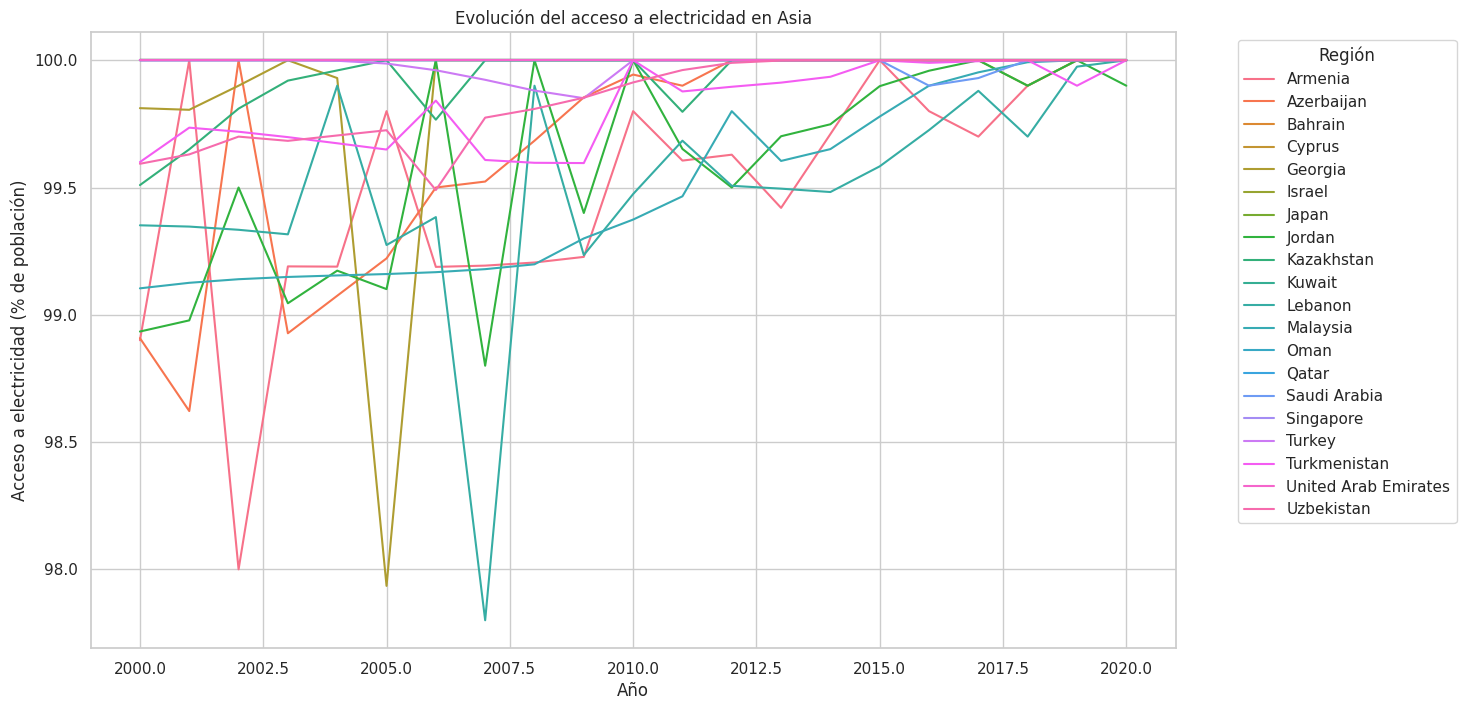

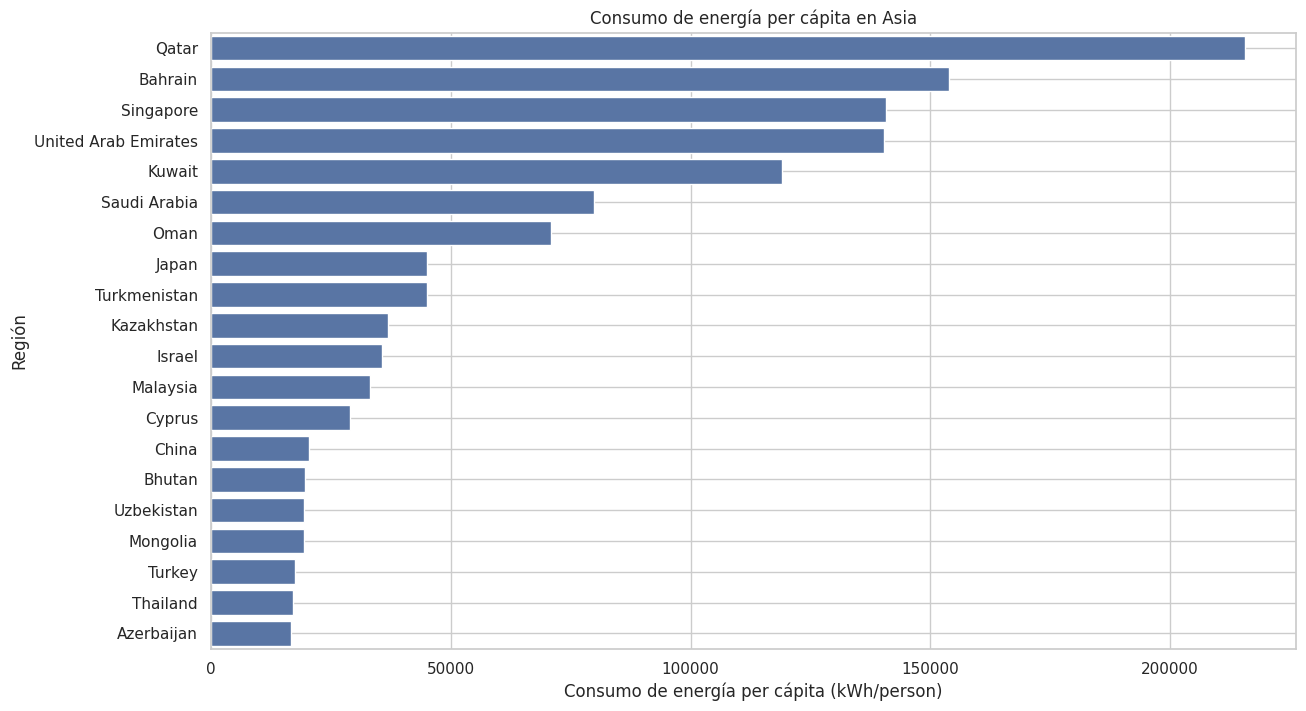

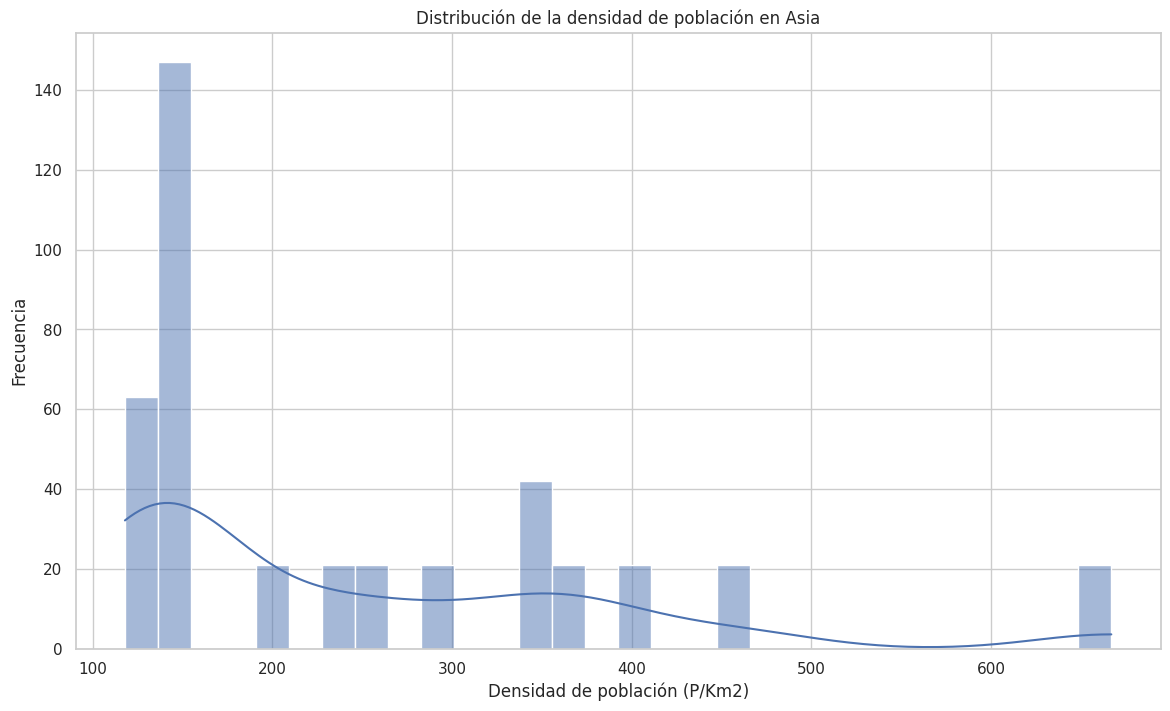

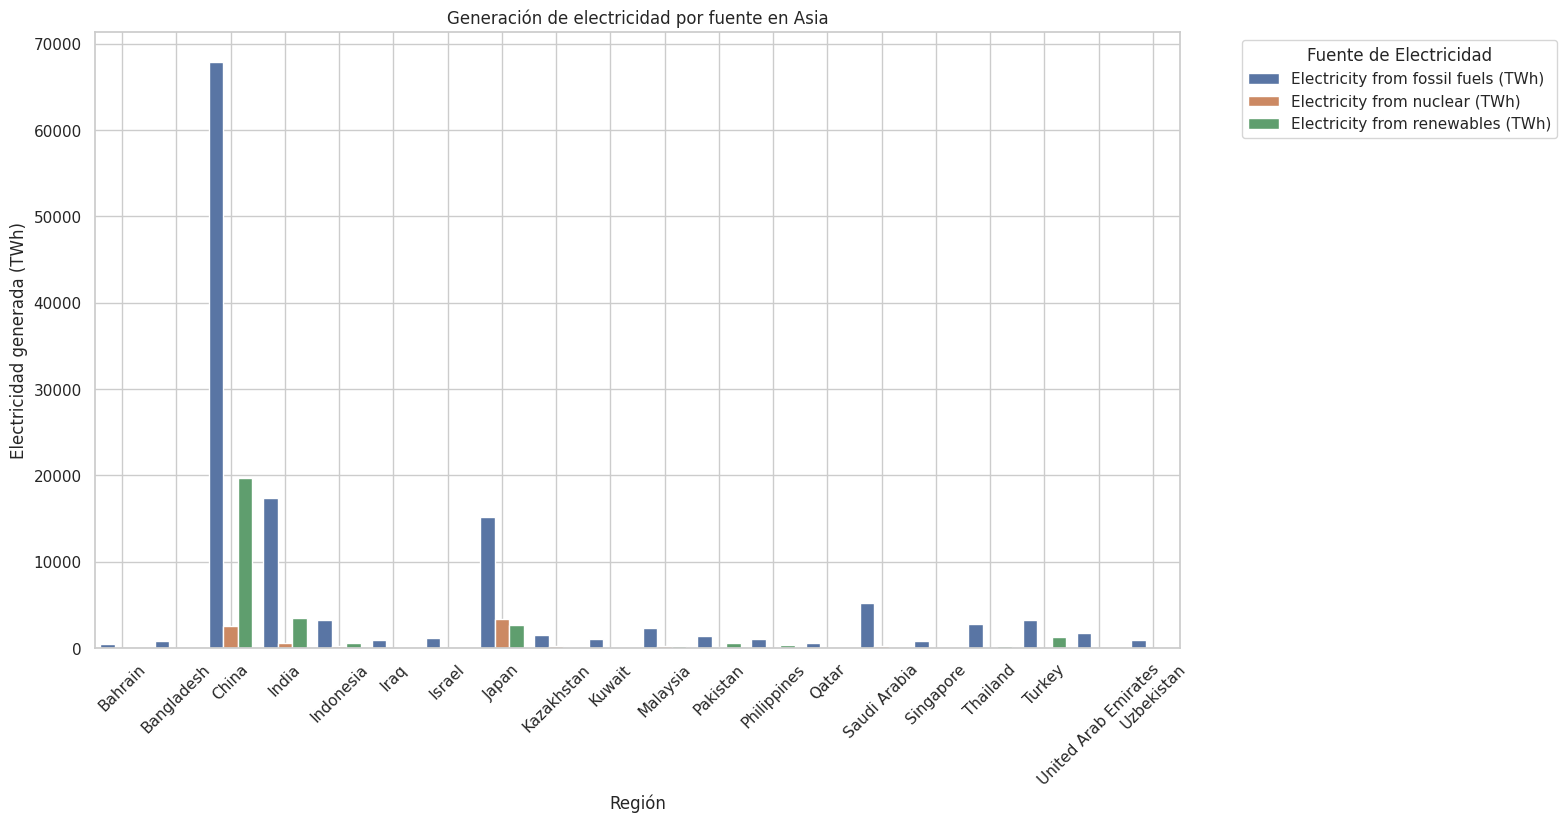

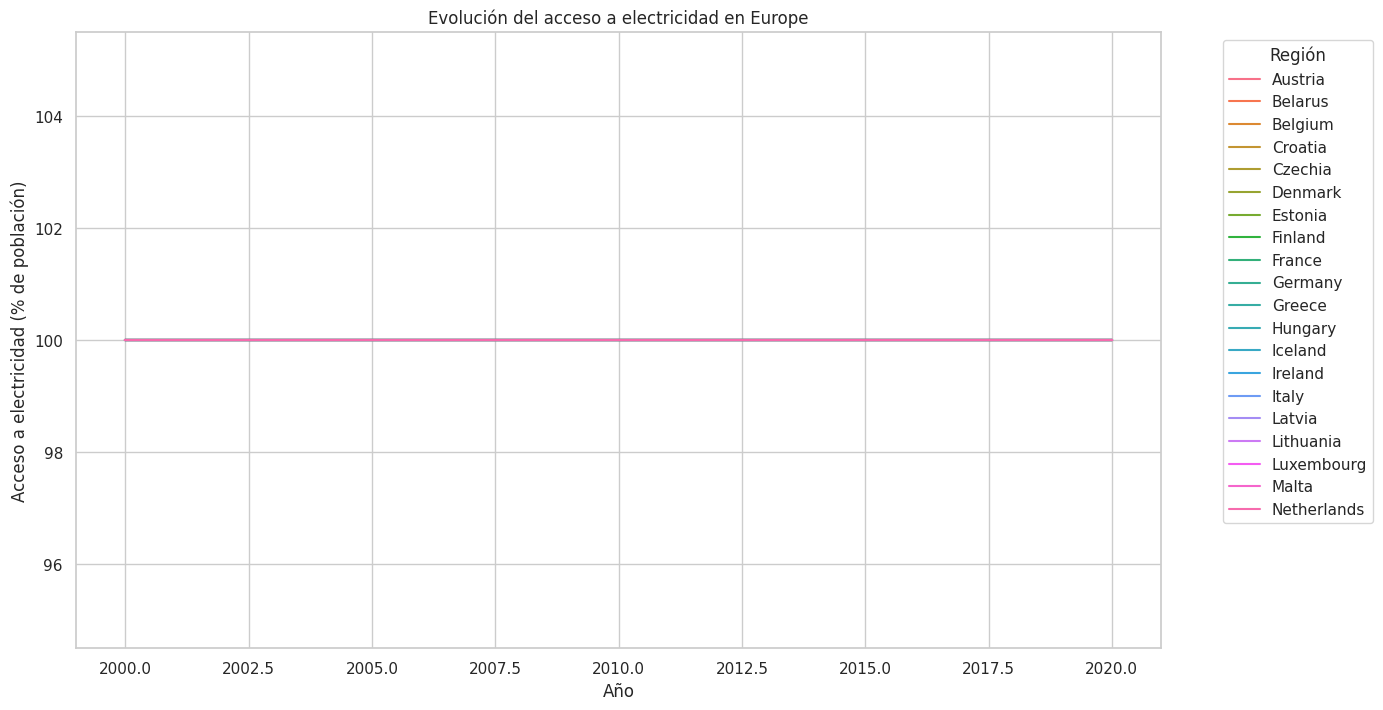

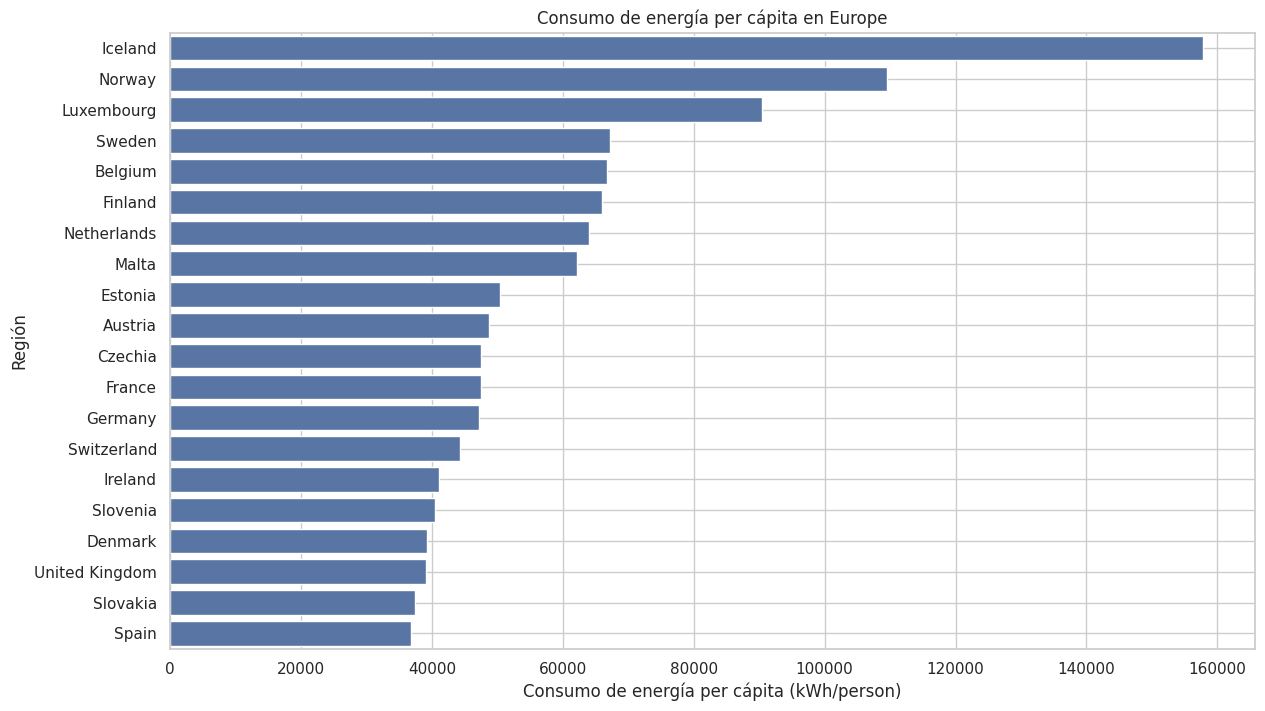

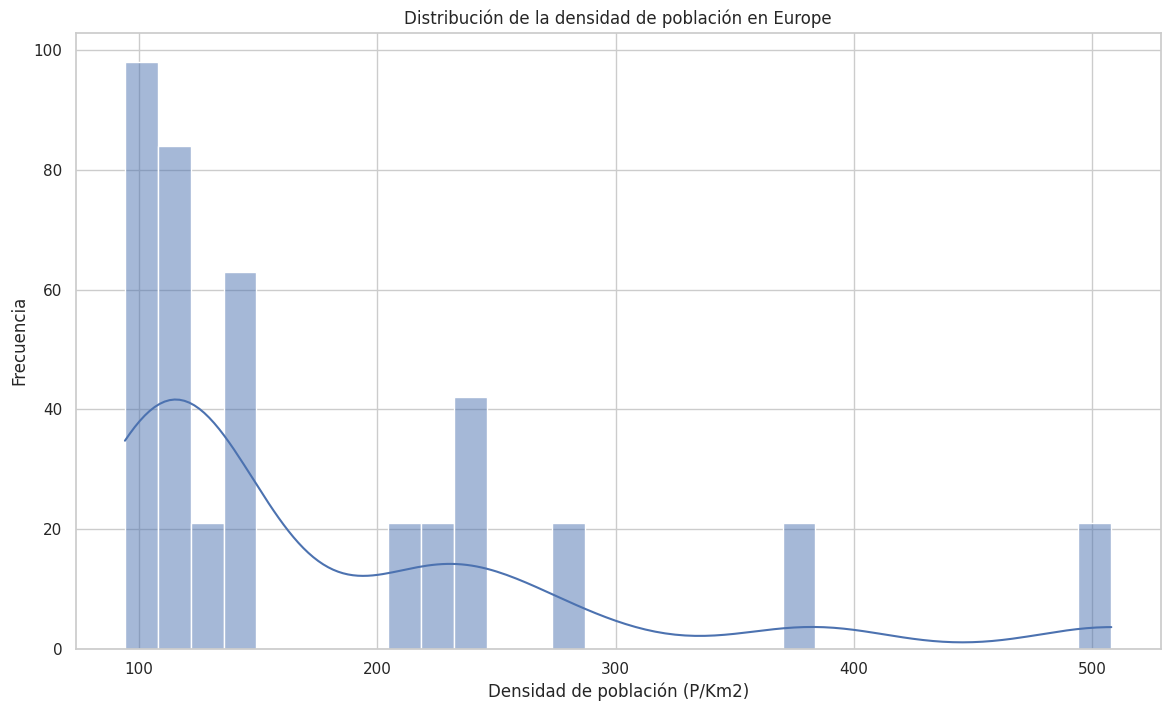

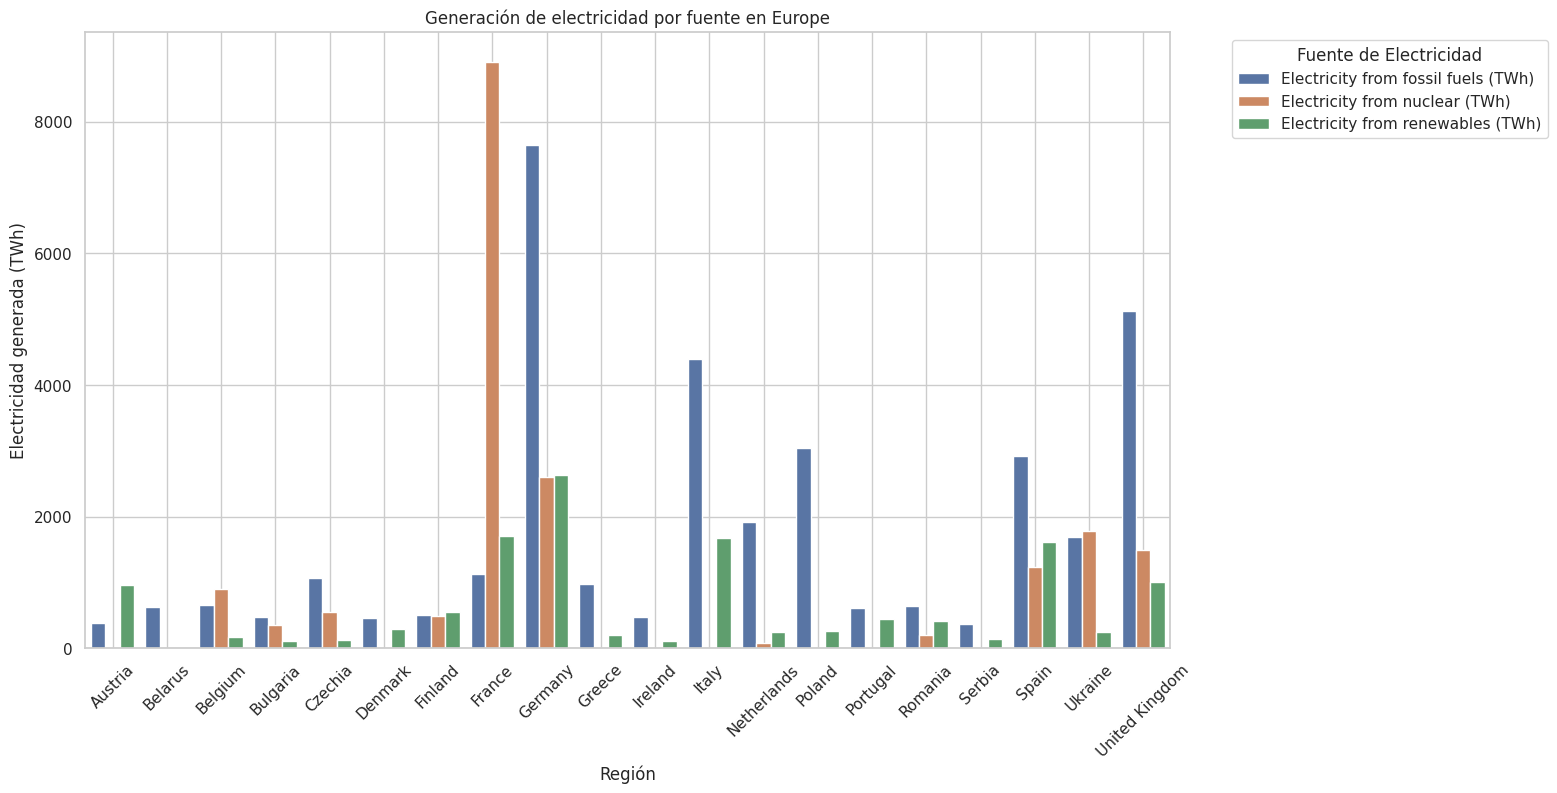

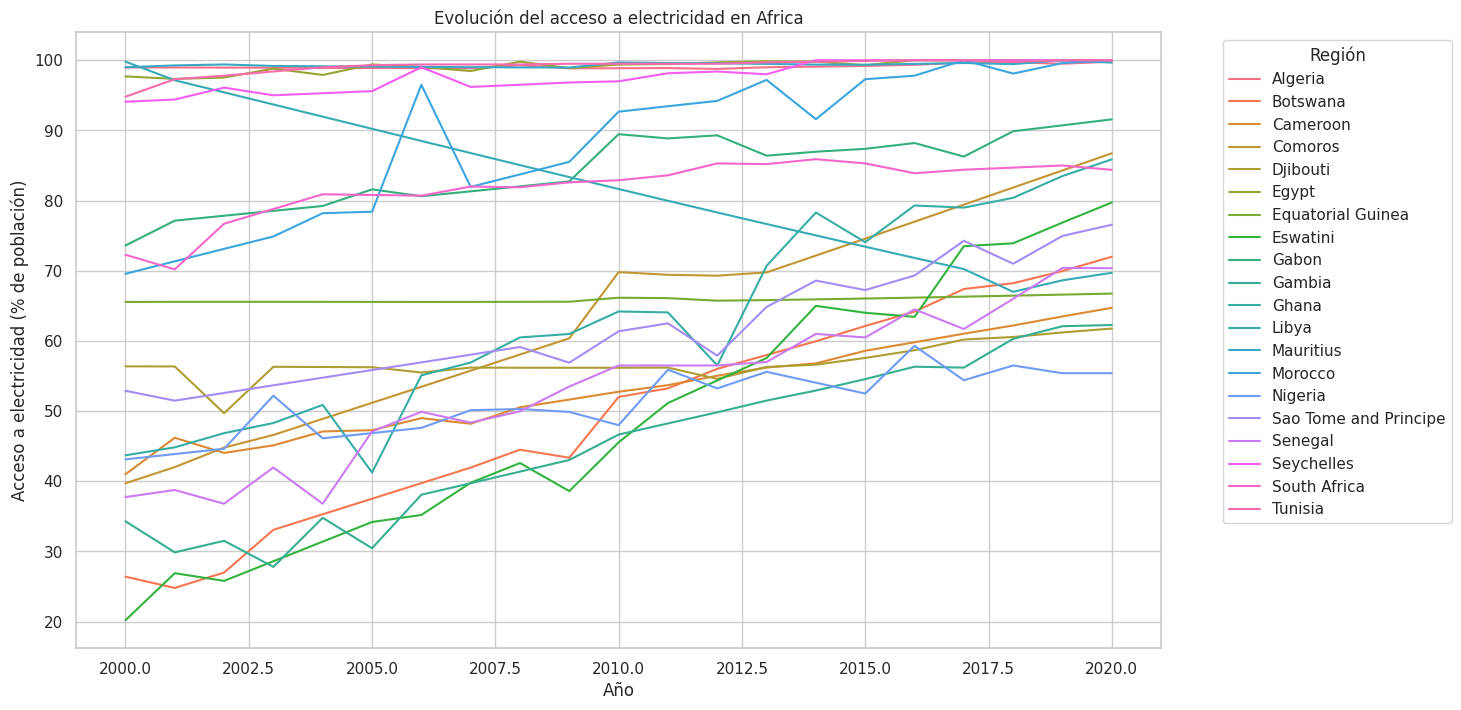

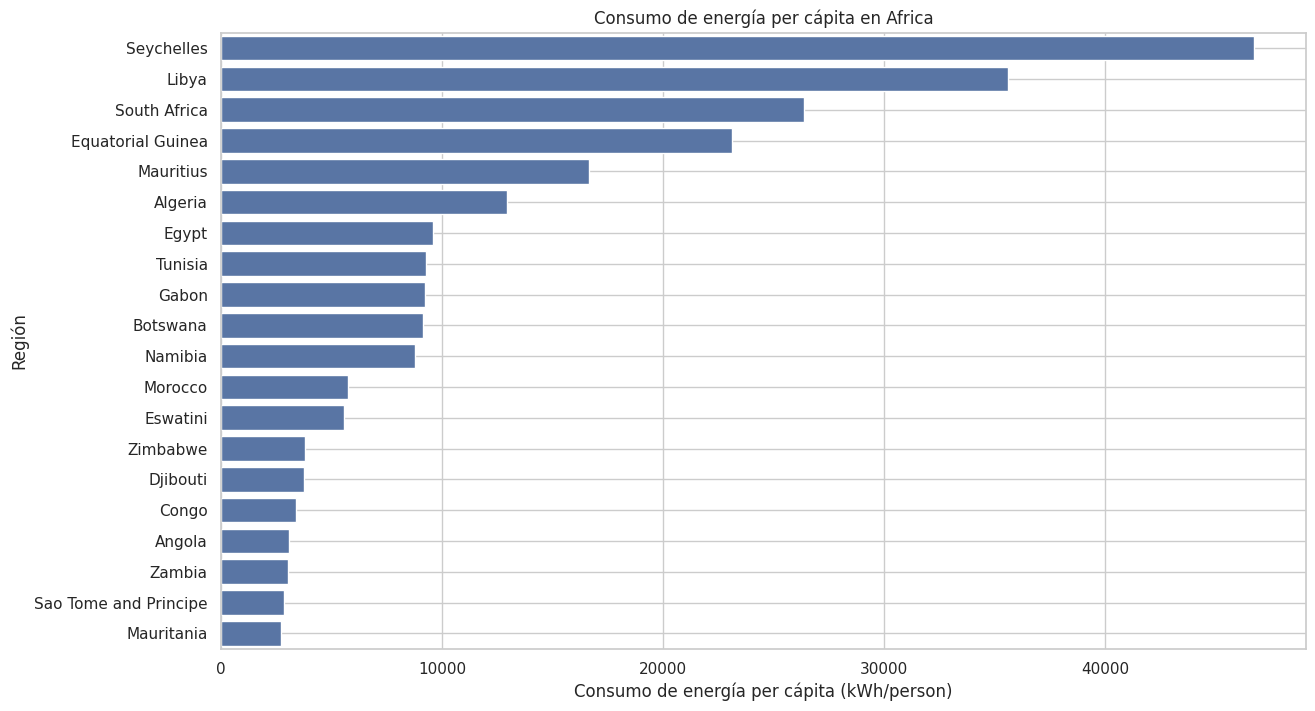

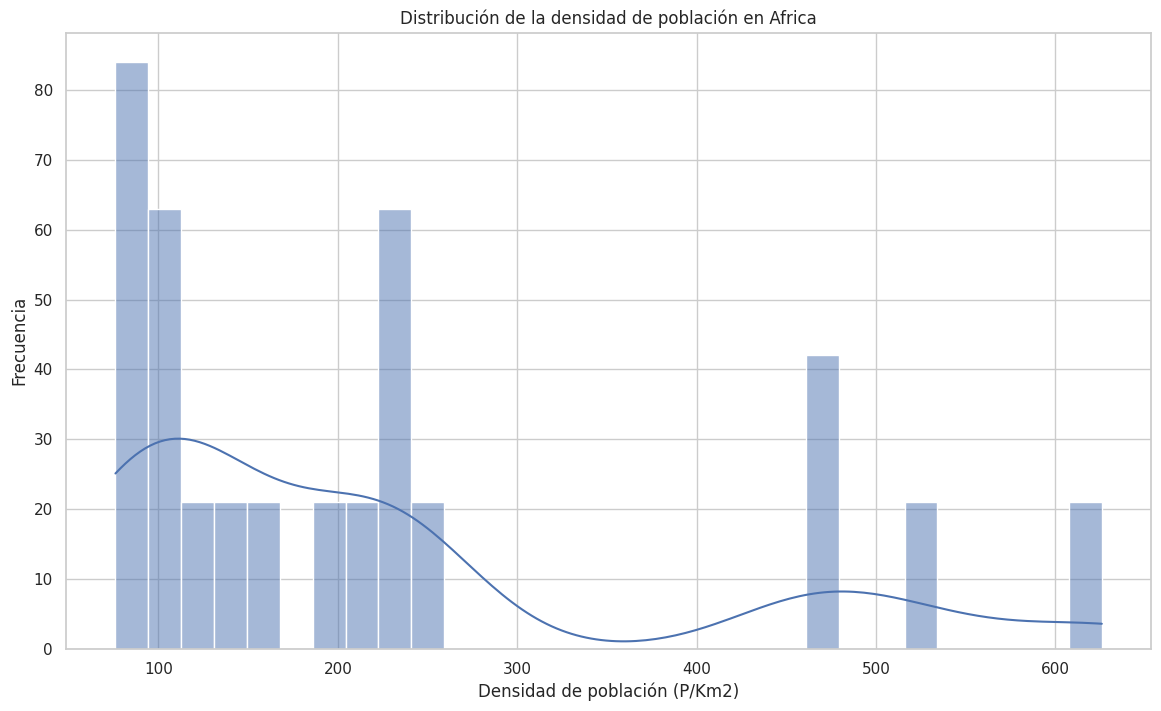

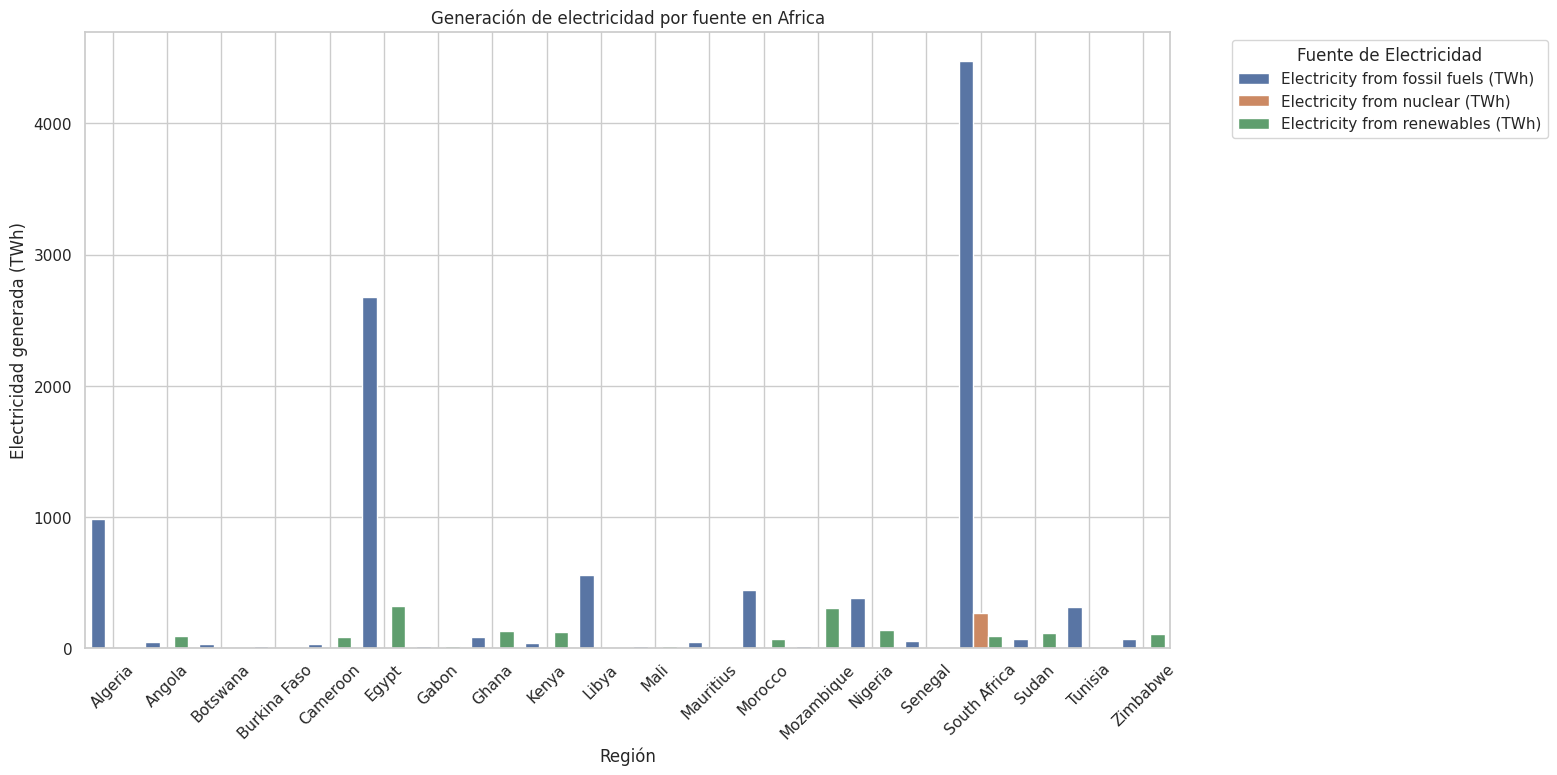

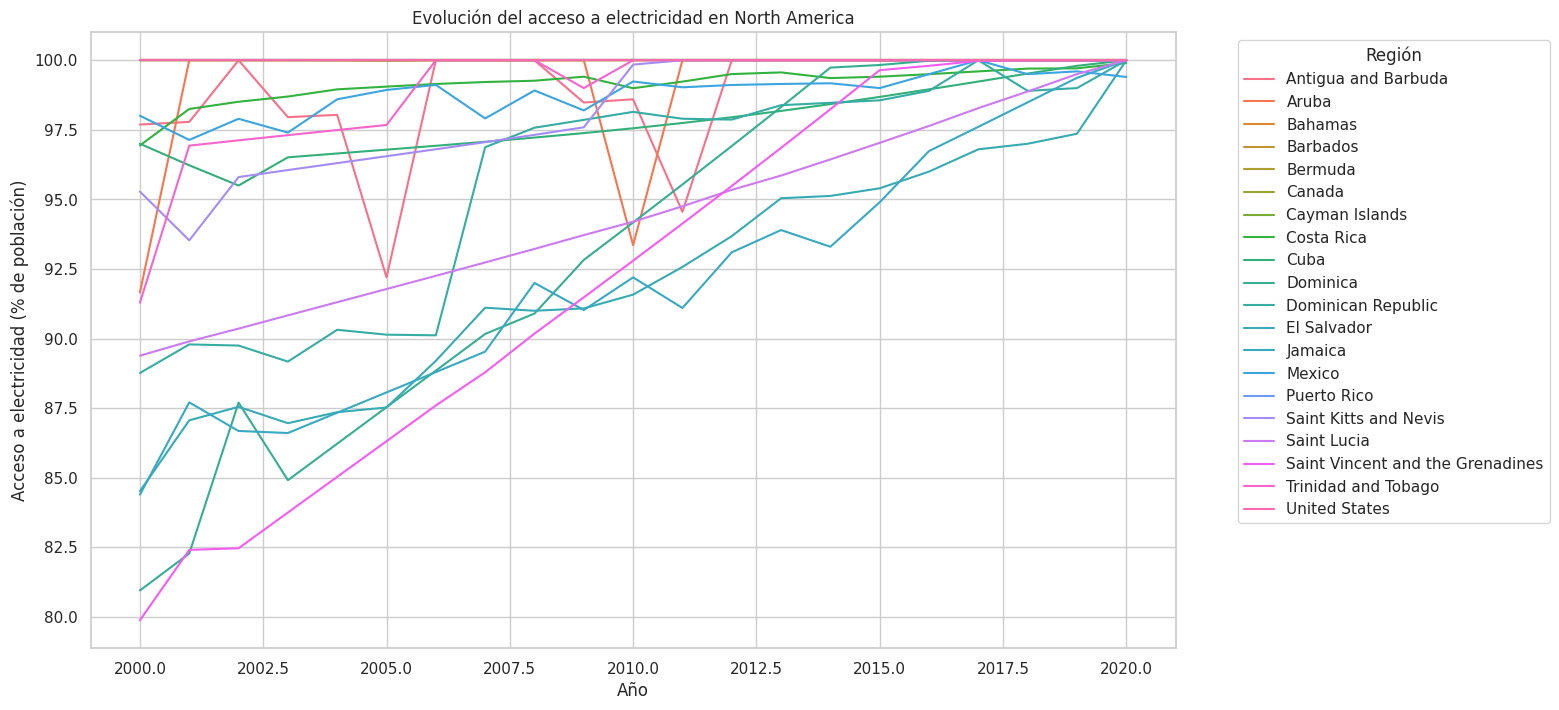

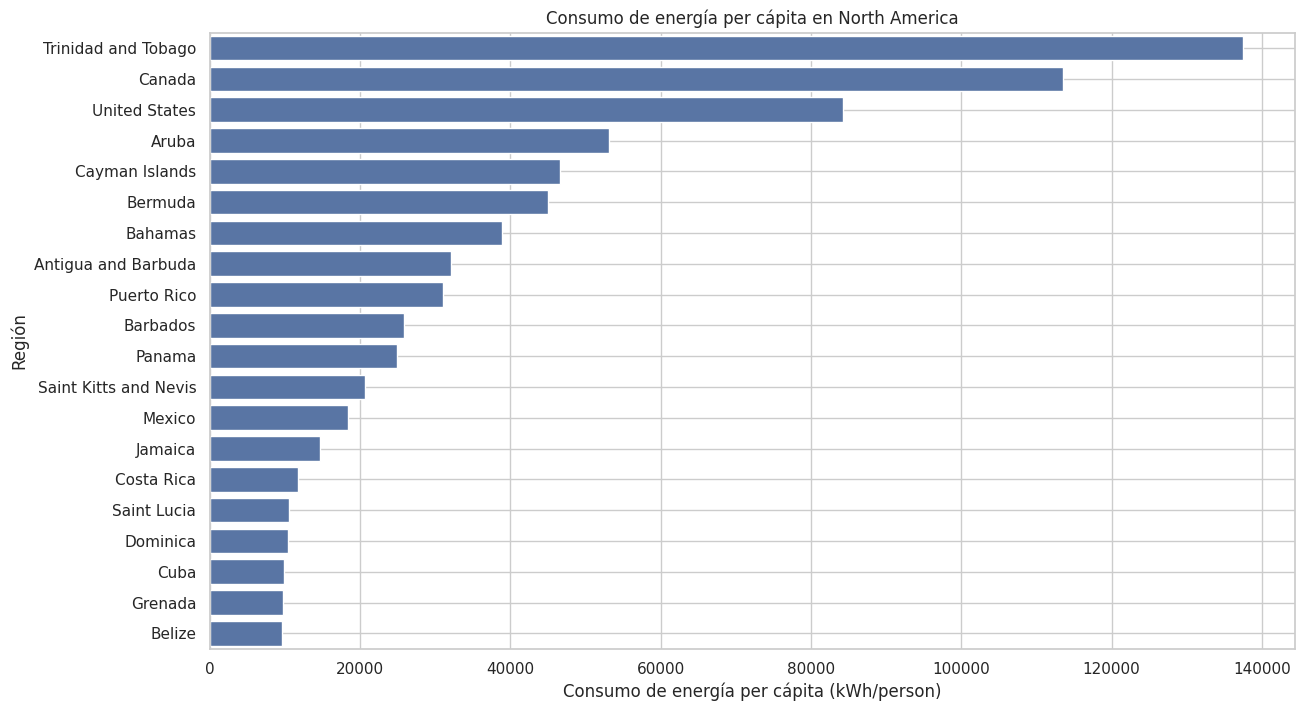

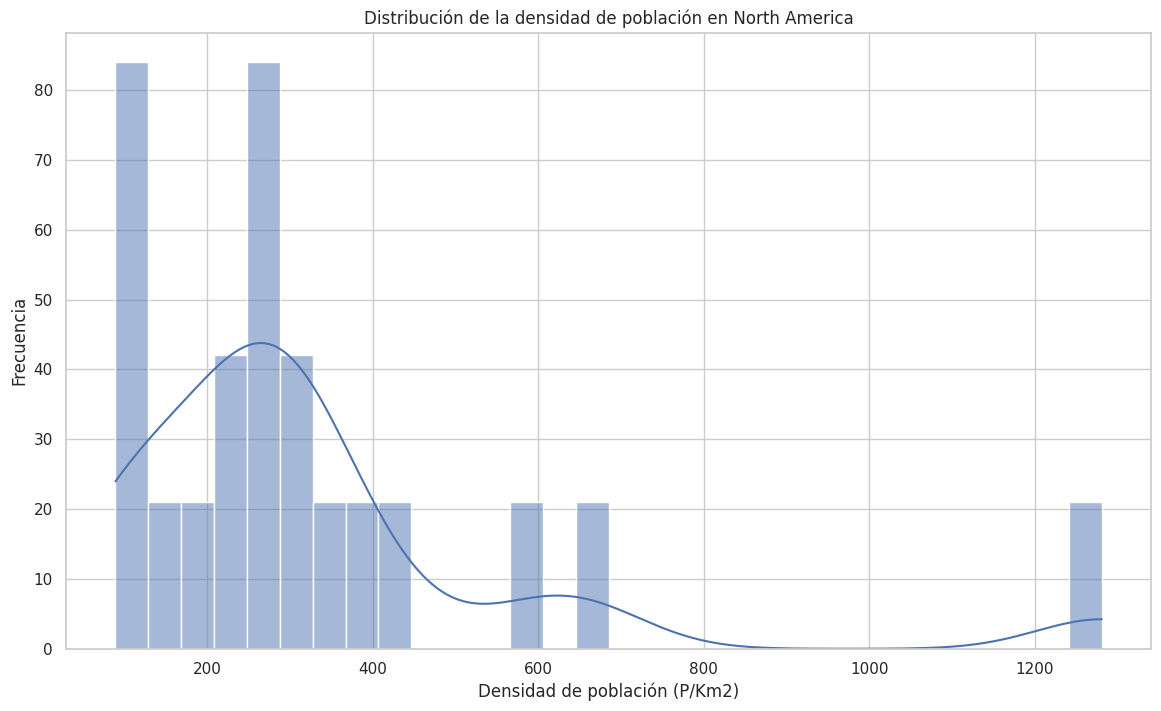

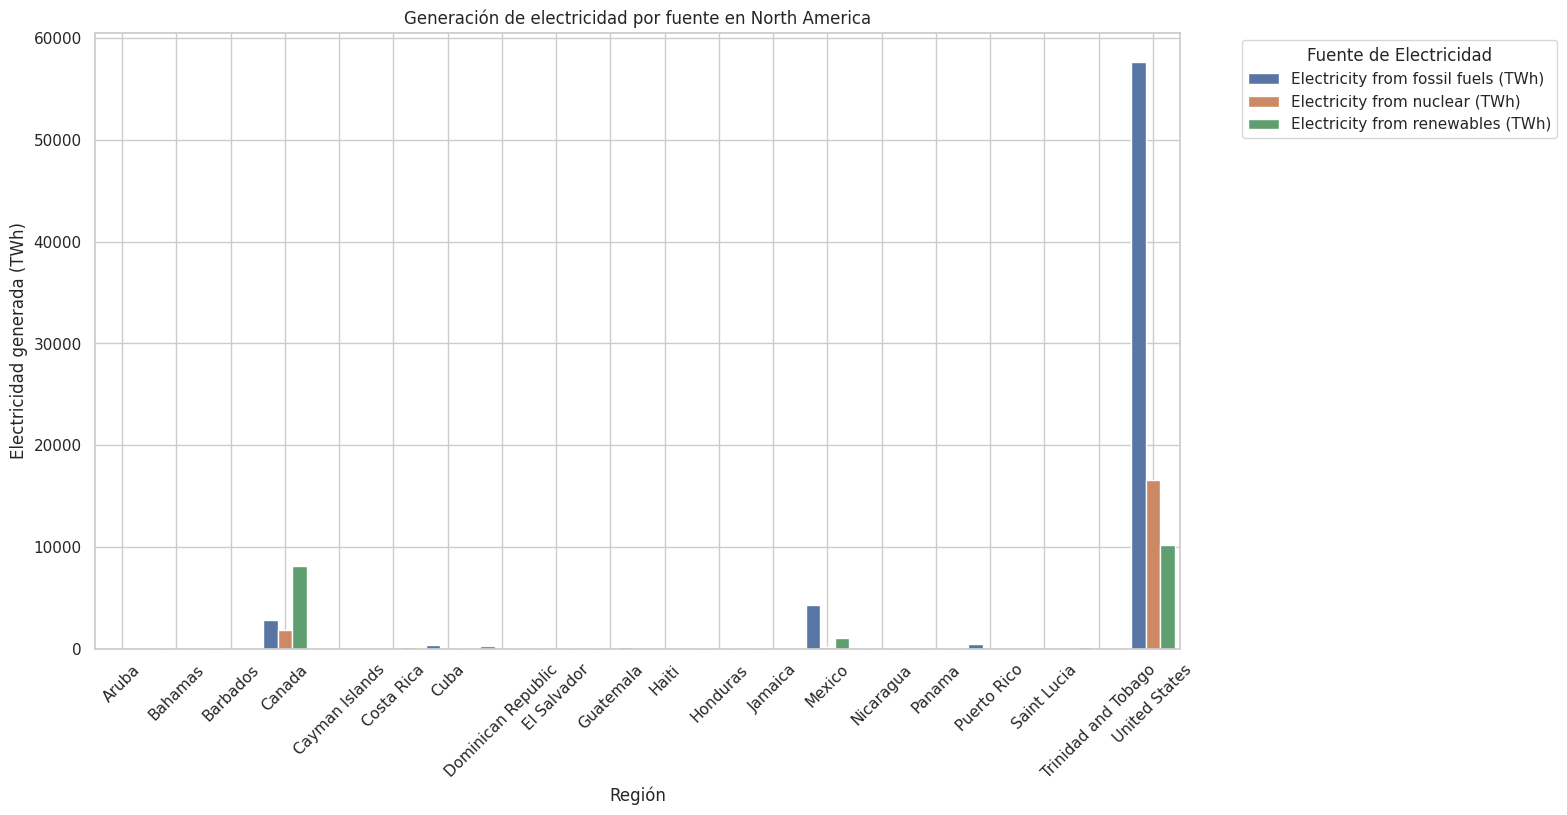

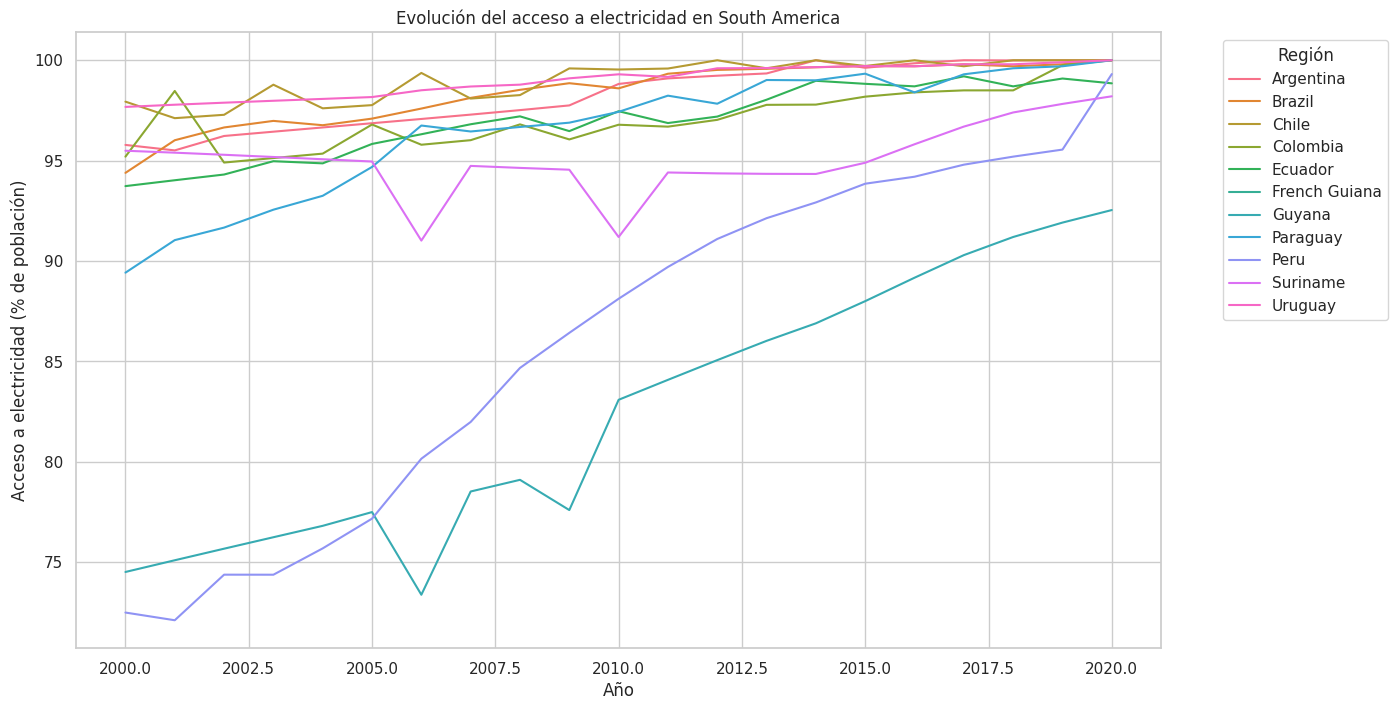

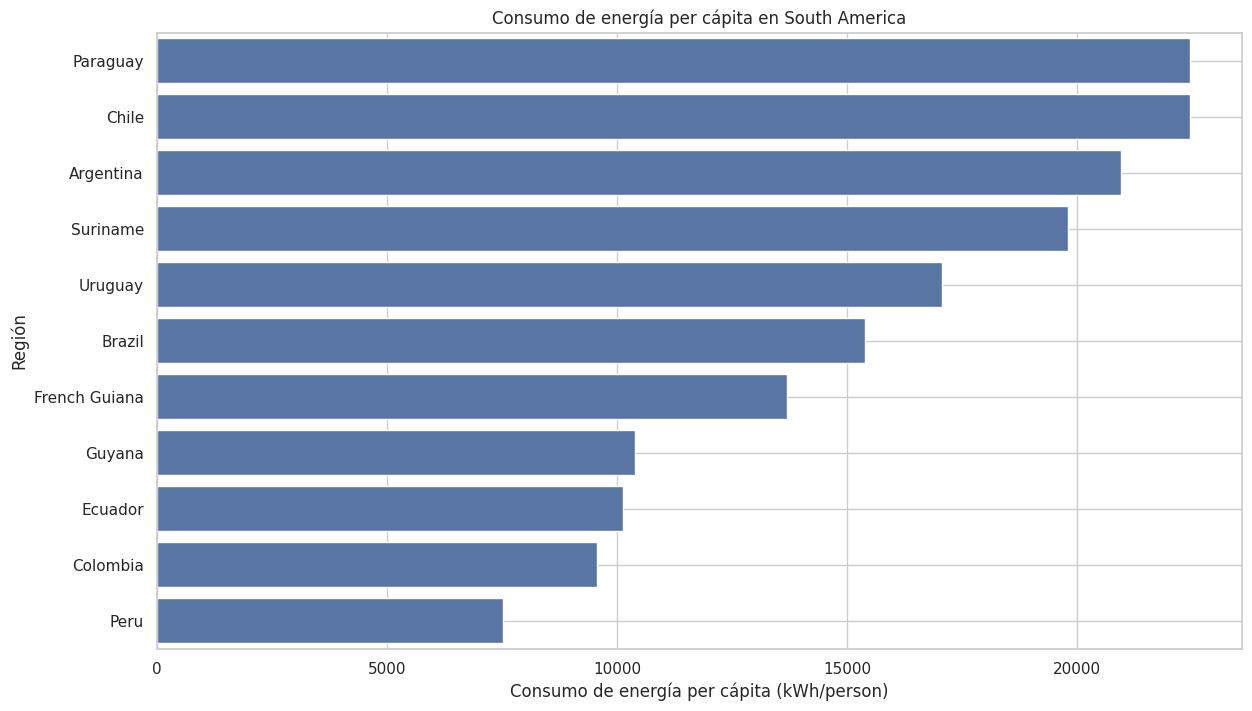

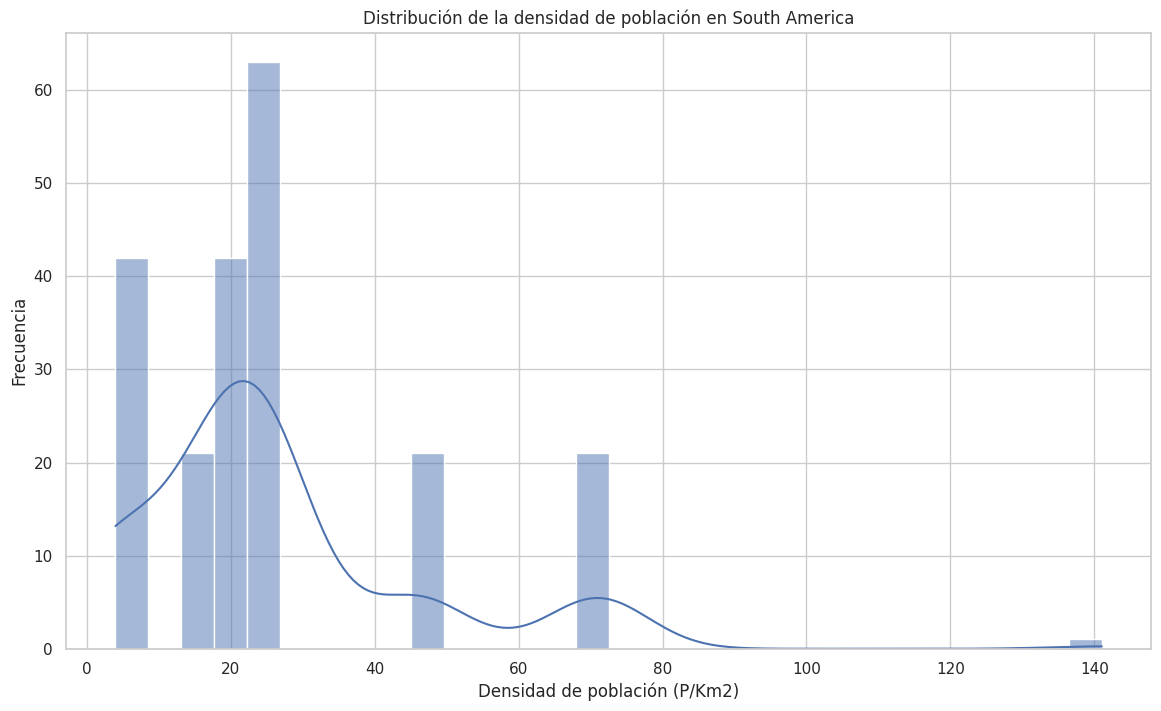

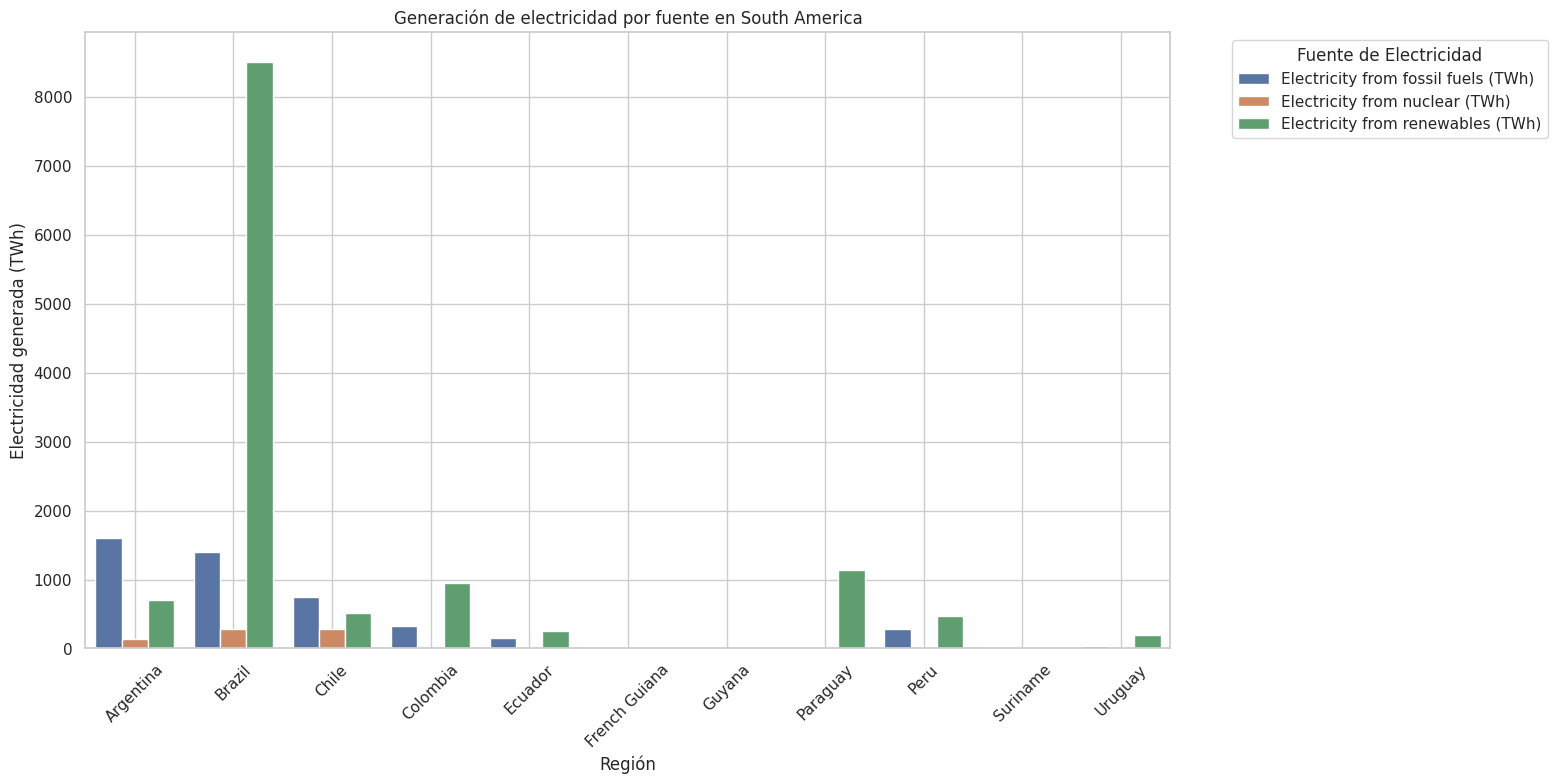

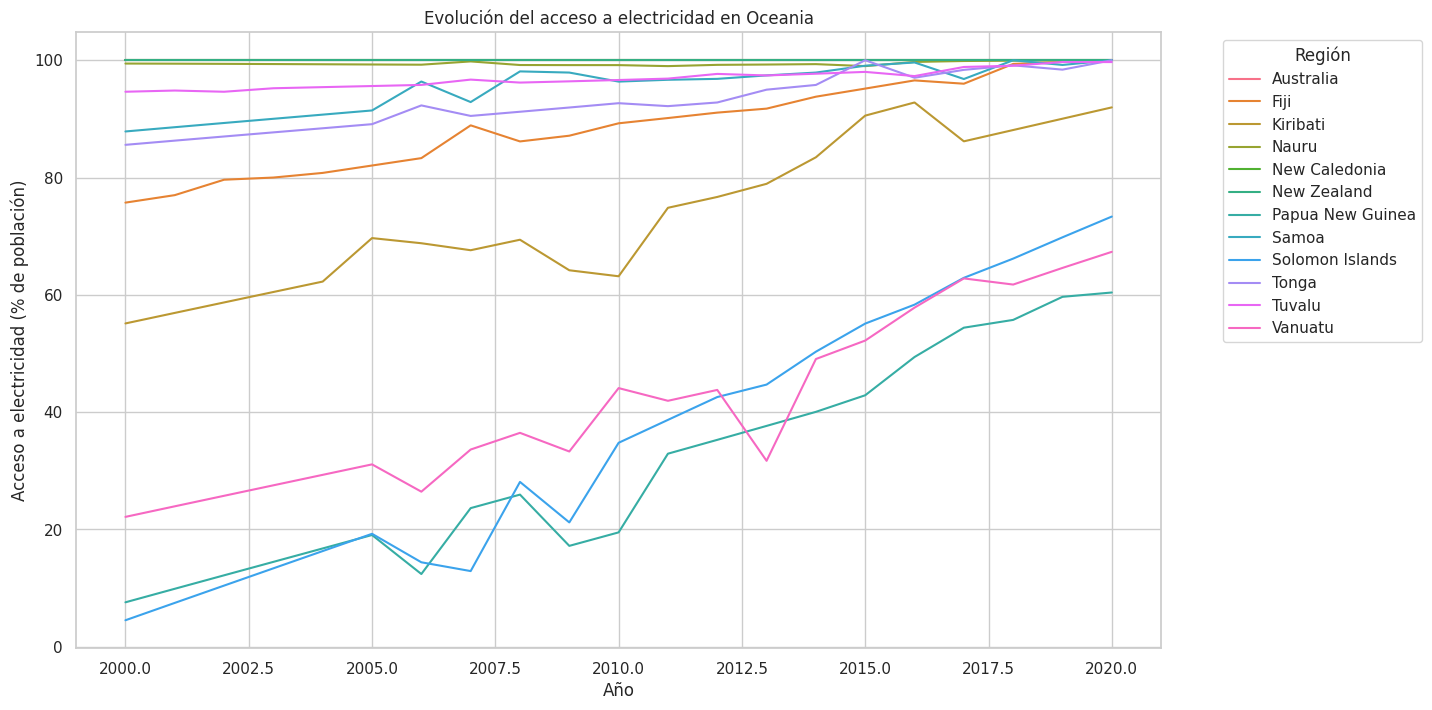

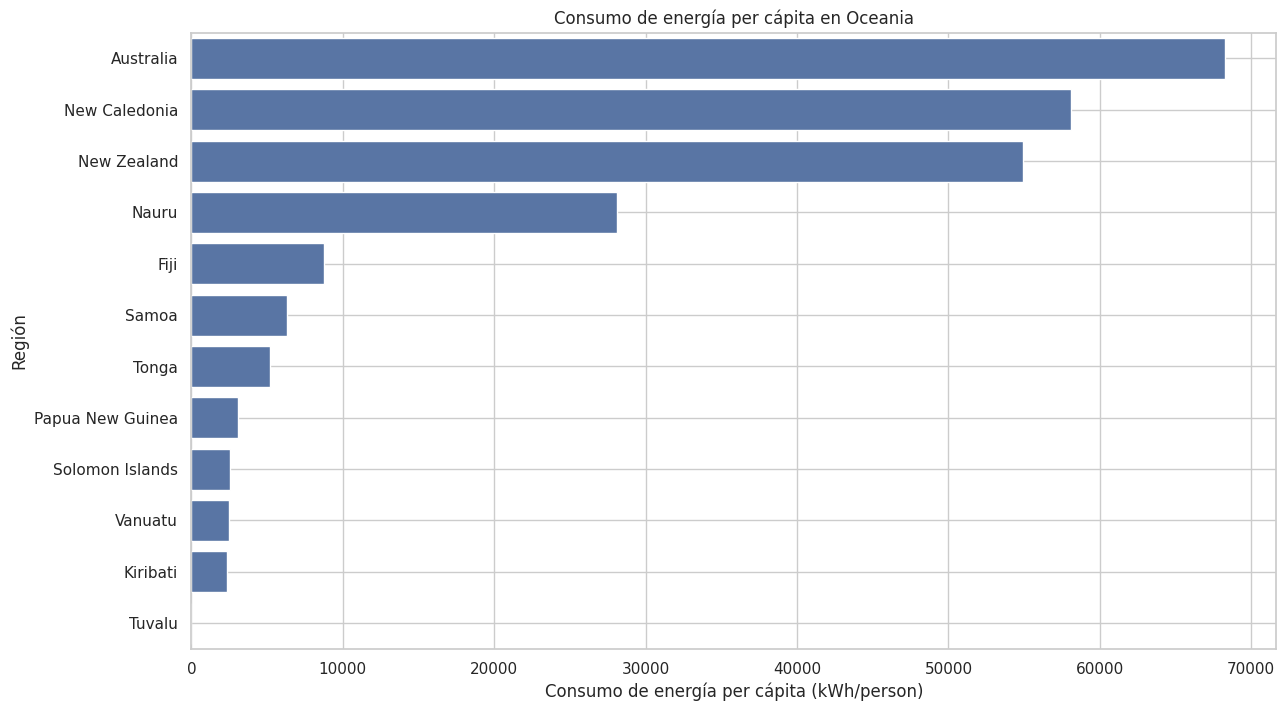

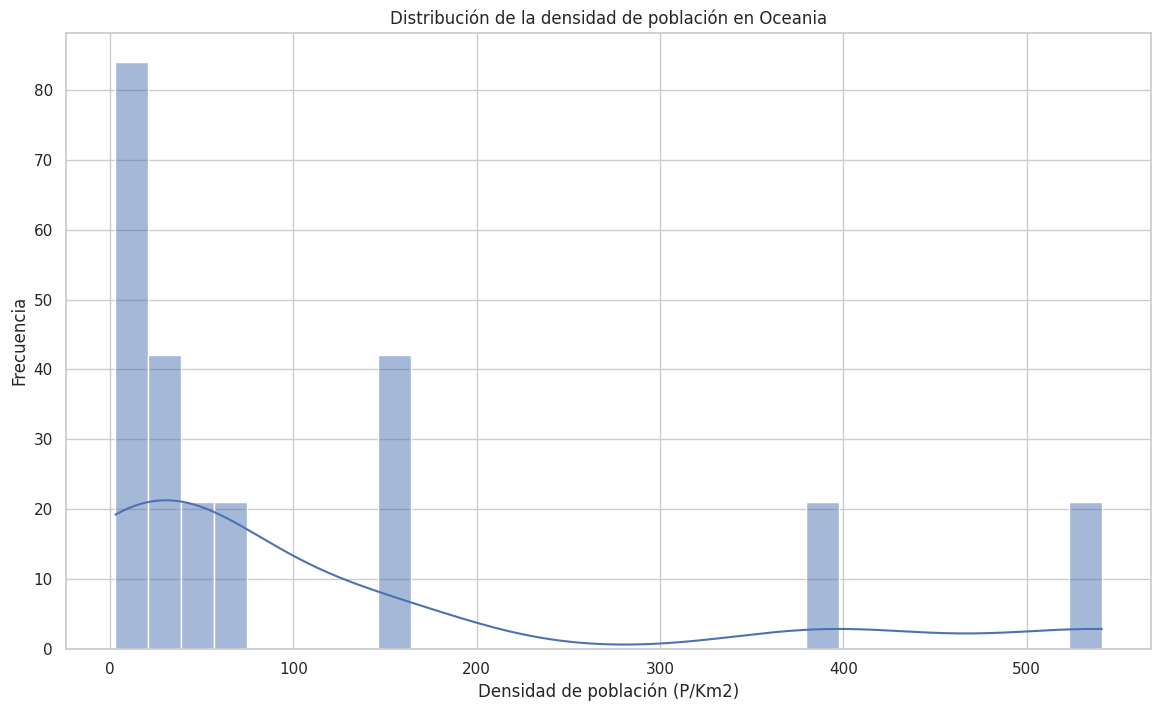

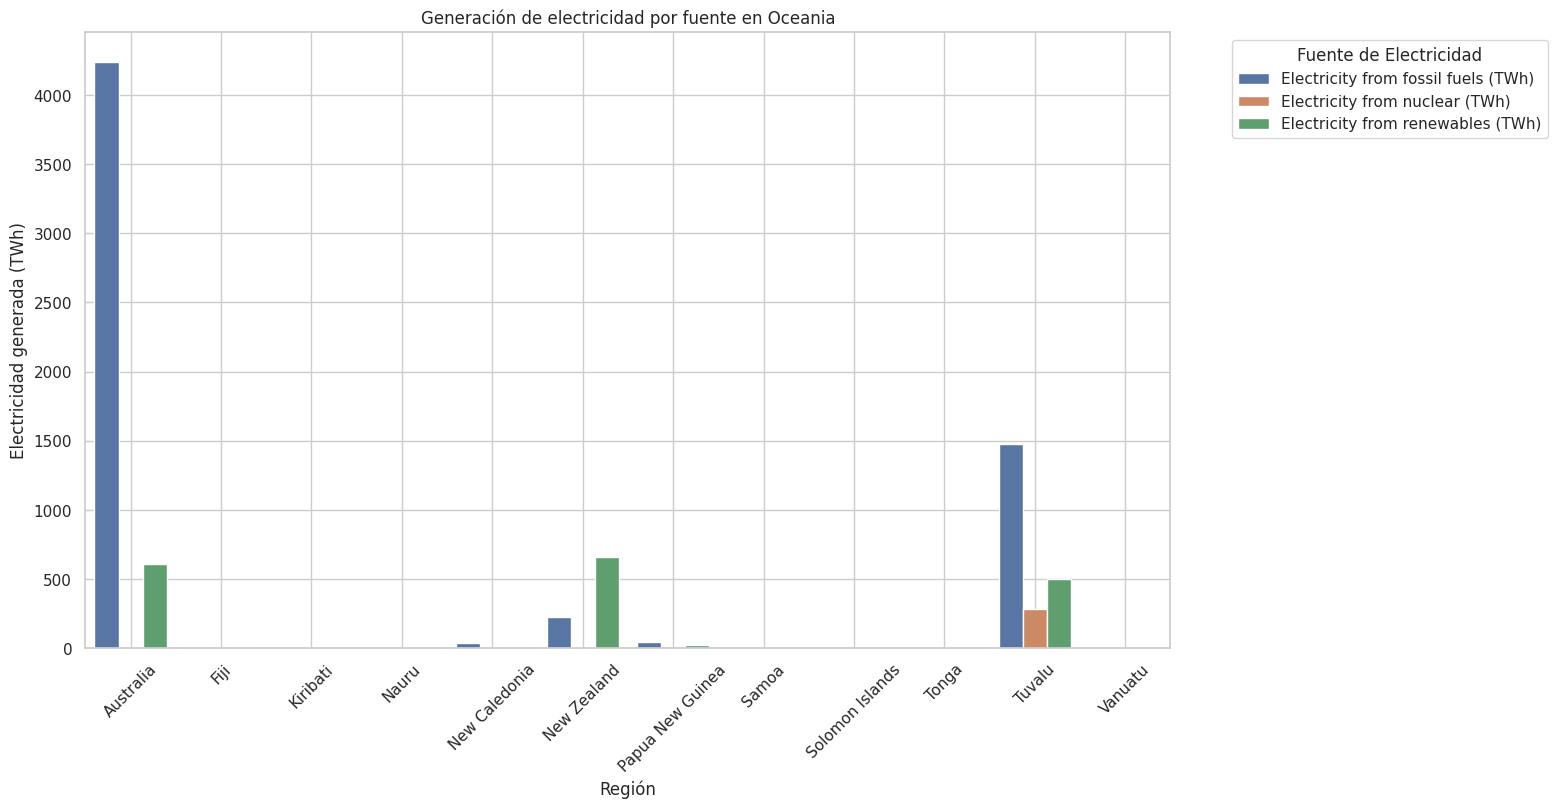

In [64]:
def plot_by_continent(df, continent):
    df_continent = energy[energy['Continent'] == continent]

    # Filtrar los primeros 20 países por diferentes métricas según sea apropiado
    top20_electricity_access = df_continent.groupby('Entity')['Access to electricity (% of population)'].mean().nlargest(20).index
    top20_energy_consumption = df_continent.groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean().nlargest(20).index
    top20_gdp_per_capita = df_continent.groupby('Entity')['gdp_per_capita'].mean().nlargest(20).index
    top20_density = df_continent.groupby('Entity')['Density (P/Km2)'].mean().nlargest(20).index
    top20_electricity_generation = df_continent.groupby('Entity')[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].sum().nlargest(20, 'Electricity from fossil fuels (TWh)').index

    # 1. Evolución del acceso a electricidad por región
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_continent[df_continent['Entity'].isin(top20_electricity_access)], x='Year', y='Access to electricity (% of population)', hue='Entity')
    plt.title(f'Evolución del acceso a electricidad en {continent}')
    plt.xlabel('Año')
    plt.ylabel('Acceso a electricidad (% de población)')
    plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # 2. Comparación del consumo de energía per cápita entre países
    df_energy_per_capita = df_continent[df_continent['Entity'].isin(top20_energy_consumption)].groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean().reset_index()
    df_energy_per_capita = df_energy_per_capita.sort_values(by='Primary energy consumption per capita (kWh/person)', ascending=False)
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df_energy_per_capita, x='Primary energy consumption per capita (kWh/person)', y='Entity')
    plt.title(f'Consumo de energía per cápita en {continent}')
    plt.xlabel('Consumo de energía per cápita (kWh/person)')
    plt.ylabel('Región')
    plt.grid(True)
    plt.show()

    # 3. Distribución de la densidad de población
    plt.figure(figsize=(14, 8))
    sns.histplot(df_continent[df_continent['Entity'].isin(top20_density)]['Density (P/Km2)'], bins=30, kde=True)
    plt.title(f'Distribución de la densidad de población en {continent}')
    plt.xlabel('Densidad de población (P/Km2)')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # 4. Comparación de la generación de electricidad por fuente
    df_electricity_sources = df_continent[df_continent['Entity'].isin(top20_electricity_generation)].groupby('Entity')[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].sum().reset_index()
    df_electricity_sources_melted = df_electricity_sources.melt(id_vars='Entity', var_name='Fuente', value_name='Electricidad (TWh)')
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df_electricity_sources_melted, x='Entity', y='Electricidad (TWh)', hue='Fuente')
    plt.title(f'Generación de electricidad por fuente en {continent}')
    plt.xlabel('Región')
    plt.ylabel('Electricidad generada (TWh)')
    plt.xticks(rotation=45)
    plt.legend(title='Fuente de Electricidad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Lista de continentes
continents = energy['Continent'].unique()

# Generar gráficos para cada continente
for continent in continents:
    plot_by_continent(energy, continent)